# Pacotes

## Versão das bibliotecas

In [ ]:
shap==0.45.0
scikit-optimize==0.10.0
pandas==2.1.4
scikit-learn==1.4.2
Unidecode==1.3.8 
scikit-plot==0.3.7 
imbalanced-learn==0.12.0 
hyperopt==0.2.7 
scipy==1.12.0 
ppscore==0.0.2 
statsmodels==0.14.1 
missingno==0.5.2 
xgboost==2.0.3 
lightgbm==4.3.0 
mlflow==2.12.1 
matplotlib==3.8.3
matplotlib-inline==0.1.6

In [ ]:
pip install --upgrade pandas

In [ ]:
pip install --upgrade pandas dask

In [ ]:
pip install dask

In [9]:
pip install scikit-learn==1.4.2 imbalanced-learn==0.9.1

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   - -------------------------------------- 0.5/10.6 MB 16.2 MB/s eta 0:00:01
   --- ------------------------------------ 1.0/10.6 MB 22.0 MB/s eta 0:00:01
   --- ------------------------------------ 1.0/10.6 MB 22.0 MB/s eta 0:00:01
   --- ------------------------------------ 1.0/10.6 MB 22.0 MB/s eta 0:00:01
   --------- ------------------------------ 2.5/10.6 MB 11.2 MB/s eta 0:00:01
   ---------------------------- ----------- 7.5/10.6 MB 28.2 MB/s eta 0:00:01
   ------------------------------- -------- 8.4/10.6 MB 29.8 MB/s eta 0:00:01
   ------------------------------- -------- 8.4/10.6 MB 29.8 MB/s eta 0:00:01
   ----------------------------------- ---- 9.5/10.6 MB 23.3 MB/s eta 0:00:01
   ---------------------------------------- 10.6/10.6 MB 25.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/199.3 kB ? eta -:--:--


  You can safely remove it manually.

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
!pip install imbalanced-learn==0.12.0 

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/257.7 kB ? eta -:--:--
   ---------------------------------------  256.0/257.7 kB 5.2 MB/s eta 0:00:01
   ---------------------------------------- 257.7/257.7 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.11.0
    Uninstalling imbalanced-learn-0.11.0:
      Successfully uninstalled imbalanced-learn-0.11.0



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!pip install Boruta
pip install sklearn-genetic-opt
pip install sklearn_stability_selection

## Import das bibliotecas

In [1]:
# Bibliotecas padrão e manipulação de dados
import os
import pickle
import re
import warnings
from datetime import datetime, date
import numpy as np
import pandas as pd
from pytz import timezone
from unidecode import unidecode

# Configurações e filtros
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno

plt.style.use('ggplot')

# Machine Learning - Modelos e Pré-processamento
import shap
import sklearn
import xgboost as xgb
import lightgbm as lgb
import ppscore as pps
from catboost import Pool
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (
    train_test_split, cross_val_score, RepeatedStratifiedKFold, KFold, StratifiedKFold, GridSearchCV
)
from sklearn.metrics import (
    accuracy_score, average_precision_score, classification_report, confusion_matrix, f1_score,
    log_loss, precision_recall_curve, precision_score, recall_score, roc_auc_score, roc_curve, auc
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import (
    VarianceThreshold, RFE, SelectFromModel, SequentialFeatureSelector, mutual_info_classif, mutual_info_regression
)
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KDTree
from sklearn.tree import DecisionTreeClassifier
from boruta import BorutaPy

# Balanceamento de classes
#from imblearn.over_sampling import SMOTE
#from imblearn.under_sampling import RandomUnderSampler
#from imblearn.pipeline import make_pipeline

# Estatística e testes de hipótese
from scipy.stats import (
    chi2_contingency, kruskal, ks_2samp, fisher_exact, mannwhitneyu, power_divergence
)
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Modelos avançados e otimização
from hyperopt import fmin, tpe, Trials, hp, STATUS_OK
from hyperopt.pyll import scope
from skopt import forest_minimize

# Avaliação de modelos e explanação
from shap import Explainer

# Salvamento e carregamento de modelos com MLflow
import mlflow
from mlflow.models import infer_signature
import mlflow.lightgbm

# Impressão de versões das bibliotecas utilizadas
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Scikit-learn version: {sklearn.__version__}")
print(f"XGBoost version: {xgb.__version__}")
print(f"LightGBM version: {lgb.__version__}")
#print(f"CatBoost version: {ctb.__version__}")
print(f"SHAP version: {shap.__version__}")
print(f"PPScore version: {pps.__version__}")
print(f"missingno version: {msno.__version__}")
print(f"MLflow version: {mlflow.__version__}")

Pandas version: 2.1.4
NumPy version: 1.26.2
Scikit-learn version: 1.4.2
XGBoost version: 2.0.2
LightGBM version: 4.4.0
SHAP version: 0.44.0
PPScore version: 0.0.2
missingno version: 0.5.2
MLflow version: 2.12.1


In [56]:
import catboost as ctb

# Dataset

In [4]:
file_path = 'C:/Users/pedro/Documents/Curso de pos graduação de EST/DADOS AVIACAO/scripts_v3/df_voos_completo_2022_2023.csv'
df = pd.read_csv(file_path)

In [5]:
df = df.sample(n=100000)

In [ ]:
df.to_csv('dataset_teste_feature_selection_anac.csv')

In [8]:
df['uf_origem'] = df['uf_origem'].fillna('EXTRANGEIRO')
df['uf_destino'] = df['uf_destino'].fillna('EXTRANGEIRO')

# Mapeamento para dias da semana e meses
mapeamento_dias = {0: 'Segunda-feira', 1: 'Terça-feira', 2: 'Quarta-feira', 3: 'Quinta-feira', 4: 'Sexta-feira', 5: 'Sábado', 6: 'Domingo'}
mapeamento_meses = {
    1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril', 5: 'Maio', 6: 'Junho',
    7: 'Julho', 8: 'Agosto', 9: 'Setembro', 10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'}

# Aplicando os mapeamentos
df['dia_semana_partida'] = df['dia_semana_partida'].map(mapeamento_dias)
df['dia_semana_chegada'] = df['dia_semana_chegada'].map(mapeamento_dias)
df['mes_partida'] = df['mes_partida'].map(mapeamento_meses)
df['mes_chegada'] = df['mes_chegada'].map(mapeamento_meses)
df= df.fillna('SI')

In [ ]:
pip install pyspark

## Versão das bibliotecas

In [ ]:
shap==0.45.0
scikit-optimize==0.10.0
pandas==2.1.4
scikit-learn==1.4.2
Unidecode==1.3.8 
scikit-plot==0.3.7 
imbalanced-learn==0.12.0 
hyperopt==0.2.7 
scipy==1.12.0 
ppscore==0.0.2 
statsmodels==0.14.1 
missingno==0.5.2 
xgboost==2.0.3 
lightgbm==4.3.0 
mlflow==2.12.1 
matplotlib==3.8.3
matplotlib-inline==0.1.6

In [ ]:
pip install --upgrade pandas

In [ ]:
pip install --upgrade pandas dask

In [ ]:
pip install google-cloud-bigquery

In [ ]:
pip install dask

## Import das bibliotecas

In [ ]:
# Definir o caminho do diretório e do arquivo CSV
diretorio = 'gol/dados_tratados'
nome_arquivo = 'historico_voo_tratados_train.csv'
caminho_completo = os.path.join(diretorio, nome_arquivo)
df.to_csv(caminho_completo, index=False)

# Feature Selection

In [7]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro

def variaveis_normalidade_shapiro(df: pd.DataFrame, alpha: float = 0.05) -> pd.DataFrame:
    """
    Aplica o teste de Shapiro-Wilk para verificar a normalidade em cada variável numérica do DataFrame.
    Retorna um DataFrame contendo as variáveis testadas com os valores do teste (statistic), os p-valores
    e uma indicação de normalidade ("Normal" se o p-valor for >= alpha, "Não Normal" caso contrário).
    
    Parâmetros:
    -----------
    df : pd.DataFrame
        DataFrame que contém os dados.
    alpha : float, opcional
        Nível de significância (padrão 0.05). Variáveis com p-valor inferior a alpha serão consideradas
        significativamente diferentes de uma distribuição normal.
        
    Retorna:
    --------
    pd.DataFrame
        DataFrame com as colunas:
          - 'variável': nome da variável numérica.
          - 'statistic': valor do teste de Shapiro-Wilk.
          - 'p_value': p‑valor obtido.
          - 'normalidade': "Normal" se p_value >= alpha, ou "Não Normal" se p_value < alpha.
        O DataFrame é ordenado em ordem crescente de p‑valor.
        
    Exceções:
    -----------
    ValueError:
        Se não houver variáveis numéricas no DataFrame para o teste.
    """
    # Seleciona apenas as colunas numéricas
    numeric_cols = df.select_dtypes(include=[np.number])
    if numeric_cols.empty:
        raise ValueError("Não há variáveis numéricas no DataFrame para realizar o teste de Shapiro-Wilk.")
    
    resultados = []
    for variavel in numeric_cols.columns:
        try:
            # Remove valores ausentes
            dados = numeric_cols[variavel].dropna()
            # O teste de Shapiro-Wilk requer pelo menos 3 observações
            if len(dados) < 3:
                print(f"Variável '{variavel}' possui menos de 3 observações; teste não aplicado.")
                continue
            stat, p = shapiro(dados)
            # Define a normalidade com base no p-valor comparado ao nível de significância
            normalidade = "Normal" if p >= alpha else "Não Normal"
            resultados.append({'variável': variavel, 'statistic': stat, 'p_value': p, 'normalidade': normalidade})
        except Exception as e:
            print(f"Erro ao processar '{variavel}': {e}")

    return pd.DataFrame(resultados).sort_values(by='p_value').reset_index(drop=True)



In [8]:
resultados_shapiro = variaveis_normalidade_shapiro(df, alpha=0.05)
resultados_shapiro

variável  statistic  \
0                                           codigo_di   0.028929   
1         umidade_relativa_do_ar_horaria_pcnt__origem   0.942345   
2             vento_direcao_horaria_gr_deg_gr__origem   0.959760   
3                      vento_rajada_maxima_ms__origem   0.981807   
4                 vento_velocidade_horaria_ms__origem   0.953129   
5              precipitacao_total_horario_mm__destino   0.122297   
6   pressao_atmosferica_ao_nivel_da_estacao_horari...   0.852649   
7   pressao_atmosferica_max_na_hora_ant_aut_mb__de...   0.852370   
8   pressao_atmosferica_min_na_hora_ant_aut_mb__de...   0.852774   
9        umidade_rel_min_na_hora_ant_aut_pcnt__origem   0.953356   
10  temperatura_do_ar_bulbo_seco_horaria_degc__des...   0.994230   
11   temperatura_maxima_na_hora_ant_aut_degc__destino   0.993871   
12   temperatura_minima_na_hora_ant_aut_degc__destino   0.993528   
13  temperatura_orvalho_max_na_hora_ant_aut_degc__...   0.973548   
14  temperatura_orvalho_min_na_hora_ant_aut_degc__...   0.970778   
15      umidade_rel_max_na_hora_ant_aut_pcnt__destino   0.930342   
16      umidade_rel_min_na_hora_ant_aut_pcnt__destino   0.958814   
17       umidade_relativa_do_ar_horaria_pcnt__destino   0.948369   
18           vento_direcao_horaria_gr_deg_gr__destino   0.959882   
19      temperatura_do_ponto_de_orvalho_degc__destino   0.971923   
20                    vento_rajada_maxima_ms__destino   0.983657   
21       umidade_rel_max_na_hora_ant_aut_pcnt__origem   0.922683   
22  temperatura_orvalho_max_na_hora_ant_aut_degc__...   0.975548   
23                            delta_tempo_partida_int   0.175300   
24                            delta_tempo_chegada_int   0.195951   
25                                    dia_mes_partida   0.953484   
26                                       hora_partida   0.974256   
27                                    dia_mes_chegada   0.953526   
28                                       hora_chegada   0.968020   
29                               latitude_aero_origem   0.877753   
30                              longitude_aero_origem   0.925702   
31  temperatura_orvalho_min_na_hora_ant_aut_degc__...   0.971873   
32                              latitude_aero_destino   0.875645   
33              precipitacao_total_horario_mm__origem   0.126294   
34  pressao_atmosferica_ao_nivel_da_estacao_horari...   0.853577   
35  pressao_atmosferica_max_na_hora_ant_aut_mb__or...   0.853191   
36  pressao_atmosferica_min_na_hora_ant_aut_mb__or...   0.853518   
37       temperatura_do_ponto_de_orvalho_degc__origem   0.973488   
38                             longitude_aero_destino   0.925516   
39               vento_velocidade_horaria_ms__destino   0.958213   
40    temperatura_maxima_na_hora_ant_aut_degc__origem   0.995142   
41    temperatura_minima_na_hora_ant_aut_degc__origem   0.995314   
42  temperatura_do_ar_bulbo_seco_horaria_degc__origem   0.995373   

         p_value normalidade  
0   0.000000e+00  Não Normal  
1   0.000000e+00  Não Normal  
2   0.000000e+00  Não Normal  
3   0.000000e+00  Não Normal  
4   0.000000e+00  Não Normal  
5   0.000000e+00  Não Normal  
6   0.000000e+00  Não Normal  
7   0.000000e+00  Não Normal  
8   0.000000e+00  Não Normal  
9   0.000000e+00  Não Normal  
10  0.000000e+00  Não Normal  
11  0.000000e+00  Não Normal  
12  0.000000e+00  Não Normal  
13  0.000000e+00  Não Normal  
14  0.000000e+00  Não Normal  
15  0.000000e+00  Não Normal  
16  0.000000e+00  Não Normal  
17  0.000000e+00  Não Normal  
18  0.000000e+00  Não Normal  
19  0.000000e+00  Não Normal  
20  0.000000e+00  Não Normal  
21  0.000000e+00  Não Normal  
22  0.000000e+00  Não Normal  
23  0.000000e+00  Não Normal  
24  0.000000e+00  Não Normal  
25  0.000000e+00  Não Normal  
26  0.000000e+00  Não Normal  
27  0.000000e+00  Não Normal  
28  0.000000e+00  Não Normal  
29  0.000000e+00  Não Normal  
30  0.000000e+00  Não Normal  
31  0.000000e+00  Não Normal  
32  0.000000e+00  Não Normal 

## Testes estatísticos 

### Chi-quadrado

In [9]:
def variaveis_significativas_chi2(df: pd.DataFrame, y: str, alpha: float = 0.05) -> pd.DataFrame:
    """
    Realiza o teste de qui-quadrado para verificar a associação entre variáveis categóricas 
    e a variável dependente. Retorna um DataFrame contendo apenas as variáveis que são 
    significativamente associadas à variável dependente (p‑valor < alpha), junto com seus p‑valores.

    Parâmetros:
    -----------
    df : pd.DataFrame
        O DataFrame que contém os dados.
    y : str
        O nome da variável dependente (target) no DataFrame.
    alpha : float, opcional
        O nível de significância (padrão é 0.05). Variáveis com p‑valor menor que alpha serão consideradas significativas.

    Retorna:
    --------
    pd.DataFrame
        Um DataFrame com duas colunas:
        — variável: nome da variável categórica significativa  
        — p_value: p‑valor do teste qui-quadrado  
        Ordenado em ordem crescente de p‑valor. Se não houver variáveis significativas, retorna um DataFrame vazio.

    Exceções:
    ---------
    ValueError:
        — Se a variável dependente não estiver presente no DataFrame.  
        — Se não houver variáveis categóricas para testar no DataFrame.
    """
    # Validação de inputs
    if y not in df.columns:
        raise ValueError(f"A variável dependente '{y}' não foi encontrada no DataFrame.")

    # Selecionar apenas colunas categóricas, excluindo a variável dependente
    colunas_categ = df.select_dtypes(include=['object']).drop(columns=[y], errors='ignore')
    if colunas_categ.empty:
        raise ValueError("Não há variáveis categóricas no DataFrame para realizar o teste de qui-quadrado.")

    # Inicializar lista de resultados
    resultados = []

    # Loop pelas colunas categóricas e executar o teste qui-quadrado
    for coluna in colunas_categ.columns:
        try:
            tabela = pd.crosstab(df[coluna], df[y])
            _, p_value, _, _ = chi2_contingency(tabela)

            # Adicionar somente se o p-valor for menor que o nível de significância
            if p_value < alpha:
                resultados.append({'variável': coluna, 'p_value': p_value})
        except Exception as e:
            print(f"Erro ao processar '{coluna}': {e}")

    # Retornar DataFrame ordenado por p-valor
    return pd.DataFrame(resultados).sort_values(by='p_value').reset_index(drop=True)


In [11]:
# Exemplo de como usar a função
colunas_significativas = variaveis_significativas_chi2(df, 'status_do_voo')
colunas_significativas

variável        p_value
0                data_chegada   0.000000e+00
1                data_partida   0.000000e+00
2   delta_tempo_partida_delta   0.000000e+00
3   delta_tempo_chegada_delta   0.000000e+00
4                  numero_voo  1.152420e-234
5                 mes_chegada  2.184505e-187
6                 mes_partida  1.098009e-186
7               nome_empresas  3.139449e-152
8                        rota  4.245692e-134
9             altitude_origem  7.518051e-129
10           descricao_origem  1.751945e-127
11              cidade_origem  4.829328e-127
12                  uf_origem  1.707100e-102
13               situacao_voo   2.156779e-91
14         dia_semana_partida   1.634352e-70
15         dia_semana_chegada   1.591014e-66
16              regiao_origem   2.575540e-55
17          descricao_destino   4.464546e-32
18           altitude_destino   7.242522e-31
19             cidade_destino   1.754466e-26
20                 uf_destino   8.495704e-17
21             regiao_destino   1.302253e-08
22           chegada_prevista   1.643423e-03
23           partida_prevista   2.006508e-03

### Teste G

In [13]:
import pandas as pd
import numpy as np
from scipy.stats import power_divergence

def variaveis_significativas_teste_g(df: pd.DataFrame, y: str, alpha: float = 0.05) -> pd.DataFrame:
    """
    Realiza o Teste G (Log‑Likelihood Test) para verificar a associação entre variáveis categóricas 
    e a variável dependente. Retorna um DataFrame contendo apenas as variáveis que são consideradas 
    significativamente associadas à variável dependente (p‑valor < alpha), junto com seus estatísticos e p‑valores.

    Parâmetros:
    -----------
    df : pd.DataFrame
        O DataFrame que contém os dados.
    y : str
        O nome da variável dependente (target) no DataFrame.
    alpha : float, opcional
        O nível de significância (padrão é 0.05). Variáveis com p‑valor menor que alpha serão consideradas significativas.

    Retorna:
    --------
    pd.DataFrame
        Um DataFrame com três colunas:
        — variável: nome da variável categórica significativa  
        — statistic: valor do teste G (log‑likelihood)  
        — p_value: p‑valor do teste  
        Ordenado em ordem crescente de p‑valor. Se não houver variáveis significativas, retorna um DataFrame vazio.

    Exceções:
    ---------
    ValueError:
        — Se a variável dependente não estiver presente no DataFrame.  
        — Se não houver variáveis categóricas para testar no DataFrame.
    """
    # Validação de inputs
    if y not in df.columns:
        raise ValueError(f"A variável dependente '{y}' não foi encontrada no DataFrame.")

    # Selecionar apenas colunas categóricas, excluindo a variável dependente
    colunas_categ = df.select_dtypes(include=['object']).drop(columns=[y], errors='ignore')
    if colunas_categ.empty:
        raise ValueError("Não há variáveis categóricas no DataFrame para realizar o Teste G.")

    # Inicializar lista de resultados
    resultados = []

    # Loop pelas colunas categóricas e executar o Teste G
    for variavel in colunas_categ.columns:
        try:
            tabela = pd.crosstab(df[y], df[variavel])
            stat, p_value = power_divergence(tabela, lambda_="log-likelihood")

            # Ajustar formato de retorno de p-value
            if isinstance(p_value, (list, np.ndarray)):
                p_value = p_value[0]

            # Adicionar somente se o p-valor for menor que o nível de significância
            if p_value < alpha:
                resultados.append({'variável': variavel, 'statistic': stat, 'p_value': p_value})
        except Exception as e:
            print(f"Erro ao processar '{variavel}': {e}")

    # Retornar DataFrame ordenado por p-valor
    return pd.DataFrame(resultados).sort_values(by='p_value').reset_index(drop=True)

In [14]:
# Exemplo de como usar a função
colunas_significativas_g = variaveis_significativas_teste_g(df, 'status_do_voo')
colunas_significativas_g

variável  \
0               nome_empresas   
1            altitude_destino   
2             altitude_origem   
3          dia_semana_chegada   
4                 mes_chegada   
5          dia_semana_partida   
6                 mes_partida   
7               regiao_origem   
8   delta_tempo_chegada_delta   
9              regiao_destino   
10         continente_destino   
11               pais_destino   
12          continente_origem   
13                pais_origem   
14               situacao_voo   
15  delta_tempo_partida_delta   
16           descricao_origem   
17          descricao_destino   
18          codigo_tipo_linha   
19                  uf_origem   
20                 uf_destino   
21               data_chegada   
22               data_partida   
23              cidade_origem   
24             cidade_destino   

                                            statistic        p_value  
0   [25939.197903931894, 13195.048483285733, 19107...   0.000000e+00  
1   [3443.0352810437885, 4341.432940413532, 155.66...   0.000000e+00  
2   [3471.7772655031004, 5524.417951635993, 206.75...   0.000000e+00  
3   [9103.294913063753, 8027.150839153302, 7373.25...   0.000000e+00  
4   [5301.31067533821, 4716.237405647729, 3548.483...   0.000000e+00  
5   [9132.296883943054, 7942.925755265915, 7356.17...   0.000000e+00  
6   [5315.2280195408675, 4718.16275526396, 3551.21...   0.000000e+00  
7   [7540.896207559728, 4178.314639712253, 12623.0...   0.000000e+00  
8   [3622.3871656062743, 3638.396049271206, 6861.7...   0.000000e+00  
9   [6056.856194969976, 3785.2383503076567, 11204....   0.000000e+00  
10                                [57556.90652239016]   0.000000e+00  
11                                [57556.90652239016]   0.000000e+00  
12                                [57556.90652239016]   0.000000e+00  
13                                [57556.90652239016]   0.000000e+00  
14            [3188.4770305757484, 44162.53966026529]   0.000000e+00  
15  [3622.3871656062743, 7983.669225689449, 10666....   0.000000e+00  
16  [1012.3430559831493, 41.589415816173265, 63.21...  3.726892e-222  
17  [928.1236795676602, 52.79230995587328, 42.7434...  7.553951e-204  
18             [798.2238932820742, 56760.76136866705]  1.312862e-175  
19  [134.83240132247442, 988.5724485097614, 1008.6...   3.592491e-31  
20  [93.85767204538008, 893.6796342869247, 960.259...   3.390476e-22  
21  [86.93974234534443, 65.45052541875148, 49.8717...   1.118785e-20  
22  [85.31805465787565, 70.99473394181078, 45.1510...   2.540331e-20  
23  [63.21459042388072, 530.9567248225461, 2.77258...   1.853702e-15  
24  [42.743455776686616, 366.45474159011656, 4.158...   6.241033e-11

### Teste exato de fisher

In [15]:
import pandas as pd
from scipy.stats import fisher_exact

def variaveis_significativas_fisher(df: pd.DataFrame, y: str, alpha: float = 0.05) -> pd.DataFrame:
    """
    Realiza o Teste Exato de Fisher para verificar a associação entre variáveis categóricas 
    e a variável dependente. Retorna um DataFrame contendo apenas as variáveis que são 
    significativamente associadas à variável dependente (p‑valor < alpha), junto com seus 
    odds ratios e p‑valores.

    Parâmetros:
    -----------
    df : pd.DataFrame
        O DataFrame que contém os dados.
    y : str
        O nome da variável dependente (target) no DataFrame.
    alpha : float, opcional
        O nível de significância (padrão é 0.05). Variáveis com p‑valor menor que alpha serão consideradas significativas.

    Retorna:
    --------
    pd.DataFrame
        Um DataFrame com três colunas:
        — variável: nome da variável categórica significativa  
        — odds_ratio: razão de chances calculada pelo Teste Exato de Fisher  
        — p_value: p‑valor do teste  
        Ordenado em ordem crescente de p‑valor. Se não houver variáveis significativas, retorna um DataFrame vazio.

    Exceções:
    ---------
    ValueError:
        — Se a variável dependente não estiver presente no DataFrame.  
        — Se não houver variáveis categóricas para testar no DataFrame.
    """
    # Validação de inputs
    if y not in df.columns:
        raise ValueError(f"A variável dependente '{y}' não foi encontrada no DataFrame.")

    # Selecionar apenas colunas categóricas, excluindo a variável dependente
    colunas_categ = df.select_dtypes(include=['object']).drop(columns=[y], errors='ignore')
    if colunas_categ.empty:
        raise ValueError("Não há variáveis categóricas no DataFrame para realizar o Teste Exato de Fisher.")

    # Inicializar lista de resultados
    resultados = []

    # Loop pelas colunas categóricas e executar o Teste Exato de Fisher
    for variavel in colunas_categ.columns:
        tabela = pd.crosstab(df[y], df[variavel])

        # Apenas tabelas 2x2 são válidas para o teste
        if tabela.shape == (2, 2):
            try:
                odds_ratio, p_value = fisher_exact(tabela)

                # Adicionar somente se o p-valor for menor que o nível de significância
                if p_value < alpha:
                    resultados.append({'variável': variavel, 'odds_ratio': odds_ratio, 'p_value': p_value})
            except Exception as e:
                print(f"Erro ao processar '{variavel}': {e}")
        else:
            print(f"Ignorando '{variavel}': tabela de contingência não é 2x2")

    # Retornar DataFrame ordenado por p-valor
    return pd.DataFrame(resultados).sort_values(by='p_value').reset_index(drop=True)


In [17]:
# Exemplo de como usar a função
colunas_significativas_fisher = variaveis_significativas_fisher(df, 'status_do_voo')
colunas_significativas_fisher

Ignorando 'nome_empresas': tabela de contingência não é 2x2
Ignorando 'numero_voo': tabela de contingência não é 2x2
Ignorando 'partida_prevista': tabela de contingência não é 2x2
Ignorando 'partida_real': tabela de contingência não é 2x2
Ignorando 'chegada_prevista': tabela de contingência não é 2x2
Ignorando 'chegada_real': tabela de contingência não é 2x2
Ignorando 'descricao_origem': tabela de contingência não é 2x2
Ignorando 'pais_origem': tabela de contingência não é 2x2
Ignorando 'continente_origem': tabela de contingência não é 2x2
Ignorando 'descricao_destino': tabela de contingência não é 2x2
Ignorando 'pais_destino': tabela de contingência não é 2x2
Ignorando 'continente_destino': tabela de contingência não é 2x2
Ignorando 'delta_tempo_partida_delta': tabela de contingência não é 2x2
Ignorando 'delta_tempo_chegada_delta': tabela de contingência não é 2x2
Ignorando 'cidade_origem': tabela de contingência não é 2x2
Ignorando 'uf_origem': tabela de contingência não é 2x2
Ignora

variável  odds_ratio        p_value
0  situacao_voo         0.0  1.741438e-163

### kruskal-wallis

In [18]:
import pandas as pd
from scipy.stats import kruskal

def variaveis_significativas_kruskal(df: pd.DataFrame, y: str, grupo1_nome: str, grupo2_nome: str, alpha: float = 0.05) -> pd.DataFrame:
    """
    Realiza o teste de Kruskal‑Wallis para verificar diferenças significativas entre dois grupos 
    de uma variável categórica em relação às variáveis numéricas. Retorna um DataFrame contendo 
    apenas as variáveis numéricas que apresentam diferenças significativas (p‑valor < alpha), 
    junto com seus estatísticos e p‑valores.

    Parâmetros:
    -----------
    df : pd.DataFrame
        O DataFrame que contém os dados.
    y : str
        O nome da variável categórica que contém os grupos (ex.: 'status_do_voo').
    grupo1_nome : str
        O valor da variável categórica correspondente ao primeiro grupo (ex.: 'Pontual').
    grupo2_nome : str
        O valor da variável categórica correspondente ao segundo grupo (ex.: 'Atrasado').
    alpha : float, opcional
        O nível de significância (padrão é 0.05). Variáveis com p‑valor menor que alpha serão consideradas significativas.

    Retorna:
    --------
    pd.DataFrame
        Um DataFrame com três colunas:
        — variável: nome da variável numérica significativa  
        — statistic: valor do teste de Kruskal‑Wallis  
        — p_value: p‑valor do teste  
        Ordenado em ordem crescente de p‑valor. Se não houver variáveis significativas, retorna um DataFrame vazio.

    Exceções:
    ---------
    ValueError:
        — Se a variável categórica y não estiver presente no DataFrame.  
        — Se não houver colunas numéricas no DataFrame.
    """
    # Validação de inputs
    if y not in df.columns:
        raise ValueError(f"A variável categórica '{y}' não foi encontrada no DataFrame.")

    # Selecionar apenas colunas numéricas
    colunas_numericas = df.select_dtypes(include=['number']).columns.tolist()
    if not colunas_numericas:
        raise ValueError("Não há colunas numéricas no DataFrame para realizar o teste Kruskal-Wallis.")

    # Inicializar lista de resultados
    resultados = []

    # Loop pelas colunas numéricas e executar o teste Kruskal-Wallis
    for coluna in colunas_numericas:
        grupo1 = df[df[y] == grupo1_nome][coluna]
        grupo2 = df[df[y] == grupo2_nome][coluna]

        # Verificar se há variabilidade suficiente em ambos os grupos
        if grupo1.nunique() > 1 and grupo2.nunique() > 1:
            stat, p_value = kruskal(grupo1, grupo2)
            # Adicionar somente se o p-valor for menor que o nível de significância
            if p_value < alpha:
                resultados.append({'variável': coluna, 'statistic': stat, 'p_value': p_value})
        else:
            print(f"Ignorando '{coluna}': valores idênticos ou insuficientes em um dos grupos")

    # Retornar DataFrame ordenado por p-valor
    return pd.DataFrame(resultados).sort_values(by='p_value').reset_index(drop=True)


In [20]:
# Exemplo de como usar a função
colunas_significativas_kruskal = variaveis_significativas_kruskal(df, 'status_do_voo', 'Pontual', 'Atrasado')
colunas_significativas_kruskal

variável     statistic        p_value
0  delta_tempo_partida_int  35913.747170   0.000000e+00
1  delta_tempo_chegada_int  24059.483784   0.000000e+00
2             hora_partida   1076.906266  3.453221e-236
3             hora_chegada    691.259731  2.378757e-152
4     latitude_aero_origem    331.406343   4.747730e-74
5    latitude_aero_destino     17.109559   3.528427e-05
6   longitude_aero_destino      8.750699   3.094833e-03

### ANOVA

In [21]:
def variaveis_significativas_anova(df: pd.DataFrame, y: str, alpha: float = 0.05) -> list:
    """
    Realiza o teste ANOVA para verificar diferenças significativas entre grupos de uma variável categórica 
    em relação às variáveis numéricas. Retorna um DataFrame contendo apenas as variáveis numéricas que são 
    significativamente associadas à variável dependente (p‑valor < alpha), junto com seus estatísticos e p‑valores.

    Parâmetros:
    -----------
    df : pd.DataFrame
        O DataFrame que contém os dados.
    y : str
        O nome da variável categórica que define os grupos.
    alpha : float, opcional
        O nível de significância (padrão é 0.05). Variáveis com p‑valor menor que alpha serão consideradas significativas.

    Retorna:
    --------
    pd.DataFrame
        Um DataFrame com três colunas:
        — variável: nome da variável numérica significativa  
        — statistic: valor F do teste ANOVA  
        — p_value: p‑valor do teste  
        Ordenado em ordem crescente de p‑valor. Se não houver variáveis significativas, retorna um DataFrame vazio.

    Exceções:
    ---------
    ValueError:
        — Se a variável categórica y não estiver presente no DataFrame.  
        — Se não houver colunas numéricas no DataFrame.
    """
   # Validação de inputs
    if y not in df.columns:
        raise ValueError(f"A variável dependente '{y}' não foi encontrada no DataFrame.")
    
    # Certifique-se de que todas as colunas numéricas sejam convertidas para float
    for col in df.select_dtypes(include=['number']).columns:
        df[col] = df[col].astype(float)
    
    # Selecionar apenas colunas numéricas, excluindo a variável dependente
    colunas_numericas = [c for c in df.select_dtypes(include=['number']).columns if c != y]
    if not colunas_numericas:
        raise ValueError("Não há colunas numéricas no DataFrame para realizar o teste ANOVA.")
    
    # Inicializar lista de resultados
    resultados = []

    # Loop pelas colunas numéricas e realizar o teste ANOVA
    for coluna in colunas_numericas:
        # Criando o modelo de ANOVA
        modelo = ols(f'{coluna} ~ C({y})', data=df).fit()
        anova_table = sm.stats.anova_lm(modelo, typ=2)
        f_stat = anova_table.loc[f"C({y})", "F"]
        p_valor = anova_table.loc[f"C({y})", "PR(>F)"]

        # Adicionar somente variáveis significativas
        if p_valor < alpha:
            resultados.append({'variável': coluna, 'statistic': f_stat, 'p_value': p_valor})

    # Retornar DataFrame ordenado por p‑valor
    return pd.DataFrame(resultados).sort_values(by='p_value').reset_index(drop=True)

In [22]:
# Exemplo de como usar a função
colunas_significativas_anova = variaveis_significativas_anova(df, 'status_do_voo')
colunas_significativas_anova

variável     statistic  \
0                             delta_tempo_partida_int  14784.632932   
1                             delta_tempo_chegada_int  10866.137491   
2                                        hora_partida   1012.551198   
3                                        hora_chegada    508.457437   
4                     vento_rajada_maxima_ms__destino    468.256965   
5                      vento_rajada_maxima_ms__origem    452.683539   
6    temperatura_maxima_na_hora_ant_aut_degc__destino    429.187488   
7    temperatura_minima_na_hora_ant_aut_degc__destino    413.424989   
8   temperatura_do_ar_bulbo_seco_horaria_degc__des...    381.355468   
9     temperatura_maxima_na_hora_ant_aut_degc__origem    289.880510   
10  temperatura_do_ar_bulbo_seco_horaria_degc__origem    251.619436   
11    temperatura_minima_na_hora_ant_aut_degc__origem    228.372884   
12                               latitude_aero_origem    226.002378   
13      umidade_rel_min_na_hora_ant_aut_pcnt__destino    207.421172   
14               vento_velocidade_horaria_ms__destino    185.262204   
15       umidade_rel_min_na_hora_ant_aut_pcnt__origem    179.257171   
16      umidade_rel_max_na_hora_ant_aut_pcnt__destino    176.282082   
17       umidade_relativa_do_ar_horaria_pcnt__destino    162.933642   
18                vento_velocidade_horaria_ms__origem    162.521477   
19        umidade_relativa_do_ar_horaria_pcnt__origem    135.854641   
20       umidade_rel_max_na_hora_ant_aut_pcnt__origem    104.188157   
21  temperatura_orvalho_max_na_hora_ant_aut_degc__...     89.678931   
22              precipitacao_total_horario_mm__origem     79.453872   
23      temperatura_do_ponto_de_orvalho_degc__destino     64.012244   
24  temperatura_orvalho_max_na_hora_ant_aut_degc__...     62.383104   
25            vento_direcao_horaria_gr_deg_gr__origem     43.268580   
26  temperatura_orvalho_min_na_hora_ant_aut_degc__...     42.870286   
27       temperatura_do_ponto_de_orvalho_degc__origem     34.592238   
28             precipitacao_total_horario_mm__destino     29.393606   
29  pressao_atmosferica_min_na_hora_ant_aut_mb__or...     18.330306   
30  pressao_atmosferica_ao_nivel_da_estacao_horari...     17.959337   
31  pressao_atmosferica_max_na_hora_ant_aut_mb__or...     17.482967   
32                              longitude_aero_origem     17.311118   
33  temperatura_orvalho_min_na_hora_ant_aut_degc__...     16.274783   
34                             longitude_aero_destino     12.536364   
35           vento_direcao_horaria_gr_deg_gr__destino     10.686614   
36                              latitude_aero_destino      9.169005   

          p_value  
0    0.000000e+00  
1    0.000000e+00  
2   4.305441e-221  
3   2.622318e-112  
4   1.469798e-103  
5   3.452580e-100  
6    4.099283e-95  
7    1.065167e-91  
8    9.495927e-85  
9    6.695573e-65  
10   1.377850e-56  
11   1.564556e-51  
12   5.047229e-51  
13   5.676302e-47  
14   3.811338e-42  
15   7.723157e-41  
16   3.436889e-40  
17   2.791798e-37  
18   3.444399e-37  
19   2.264616e-31  
20   1.899062e-24  
21   2.867136e-21  
22   5.029121e-19  
23   1.251339e-15  
24   2.859778e-15  
25   4.798481e-11  
26   5.881155e-11  
27   4.079846e-09  
28   5.922928e-08  
29   1.859235e-05  
30   2.259019e-05  
31   2.901707e-05  
32   3.175896e-05  
33   5.483442e-05  
34   3.992894e-04  
35   1.079549e-03  
36   2.462111e-03

### V-Crammer

In [23]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

def cramers_v(tabela_contingencia: pd.DataFrame) -> float:
    """
    Calcula o V de Cramer para uma tabela de contingência.
    """
    chi2, _, _, _ = chi2_contingency(tabela_contingencia)
    n = tabela_contingencia.values.sum()
    r, k = tabela_contingencia.shape
    return np.sqrt(chi2 / (n * (min(r - 1, k - 1))))

def variaveis_significativas_v_cramer(df: pd.DataFrame, y: str, alpha: float = 0.05) -> pd.DataFrame:
    """
    Realiza o teste do V de Cramer para verificar a força da associação entre variáveis categóricas 
    e a variável dependente categórica. Retorna um DataFrame contendo apenas as variáveis que são 
    significativamente associadas à variável dependente (p‑valor < alpha), junto com seus valores 
    de V de Cramer e p‑valores.

    Parâmetros:
    -----------
    df : pd.DataFrame
        O DataFrame que contém os dados.
    y : str
        O nome da variável dependente (target) no DataFrame.
    alpha : float, opcional
        O nível de significância (padrão é 0.05). Variáveis com p‑valor menor que alpha serão consideradas significativas.

    Retorna:
    --------
    pd.DataFrame
        Um DataFrame com três colunas:
        — variável: nome da variável categórica significativa  
        — V_de_Cramer: valor do índice de associação de Cramer  
        — p_value: p‑valor do teste qui-quadrado  
        Ordenado em ordem crescente de p‑valor. Se não houver variáveis significativas, retorna um DataFrame vazio.

    Exceções:
    ---------
    ValueError:
        — Se a variável dependente não estiver presente no DataFrame.  
        — Se não houver variáveis categóricas no DataFrame.
    """
    # Validação de inputs
    if y not in df.columns:
        raise ValueError(f"A variável dependente '{y}' não foi encontrada no DataFrame.")

    # Selecionar apenas colunas categóricas, excluindo a variável dependente
    colunas_categ = df.select_dtypes(include=['object']).drop(columns=[y], errors='ignore')
    if colunas_categ.empty:
        raise ValueError("Não há variáveis categóricas no DataFrame para realizar o teste do V de Cramer.")

    # Inicializar lista de resultados
    resultados = []

    # Loop pelas colunas categóricas e calcular V de Cramer + p-valor
    for coluna in colunas_categ.columns:
        tabela = pd.crosstab(df[coluna], df[y])
        v = cramers_v(tabela)
        _, p_value, _, _ = chi2_contingency(tabela)

        # Adicionar somente se o p-valor for menor que o nível de significância
        if p_value < alpha:
            resultados.append({'variável': coluna, 'V_de_Cramer': v, 'p_value': p_value})

    # Retornar DataFrame ordenado por p-valor
    return pd.DataFrame(resultados).sort_values(by='p_value').reset_index(drop=True)


In [24]:
# Exemplo de como usar a função
colunas_significativas_v_cramer = variaveis_significativas_v_cramer(df, 'status_do_voo')
colunas_significativas_v_cramer

variável  V_de_Cramer        p_value
0                data_chegada     0.211980   0.000000e+00
1                data_partida     0.214184   0.000000e+00
2   delta_tempo_partida_delta     0.962388   0.000000e+00
3   delta_tempo_chegada_delta     0.694902   0.000000e+00
4                  numero_voo     0.286815  1.152420e-234
5                 mes_chegada     0.095224  2.184505e-187
6                 mes_partida     0.095052  1.098009e-186
7               nome_empresas     0.083528  3.139449e-152
8                        rota     0.142994  4.245692e-134
9             altitude_origem     0.089620  7.518051e-129
10           descricao_origem     0.090895  1.751945e-127
11              cidade_origem     0.090772  4.829328e-127
12                  uf_origem     0.075112  1.707100e-102
13               situacao_voo     0.069403   2.156779e-91
14         dia_semana_partida     0.058358   1.634352e-70
15         dia_semana_chegada     0.056743   1.591014e-66
16              regiao_origem     0.051103   2.575540e-55
17          descricao_destino     0.056606   4.464546e-32
18           altitude_destino     0.054045   7.242522e-31
19             cidade_destino     0.053534   1.754466e-26
20                 uf_destino     0.036826   8.495704e-17
21             regiao_destino     0.020620   1.302253e-08
22           chegada_prevista     0.880362   1.643423e-03
23           partida_prevista     0.878217   2.006508e-03

### Mann-Whitney U

In [25]:
import pandas as pd
from scipy.stats import mannwhitneyu

def variaveis_significativas_mannwhitney(df: pd.DataFrame, y: str, grupo1_nome: str, grupo2_nome: str, alpha: float = 0.05) -> pd.DataFrame:
    """
    Realiza o teste Mann‑Whitney U para verificar diferenças significativas entre dois grupos 
    de uma variável categórica em relação às variáveis numéricas. Retorna um DataFrame contendo 
    apenas as variáveis numéricas que apresentam diferenças significativas (p‑valor < alpha), 
    junto com seus estatísticos e p‑valores.

    Parâmetros:
    -----------
    df : pd.DataFrame
        O DataFrame que contém os dados.
    y : str
        O nome da variável categórica que contém os grupos (ex.: 'status_do_voo').
    grupo1_nome : str
        O valor da variável categórica correspondente ao primeiro grupo (ex.: 'Pontual').
    grupo2_nome : str
        O valor da variável categórica correspondente ao segundo grupo (ex.: 'Atrasado').
    alpha : float, opcional
        O nível de significância (padrão é 0.05). Variáveis com p‑valor menor que alpha serão consideradas significativas.

    Retorna:
    --------
    pd.DataFrame
        Um DataFrame com três colunas:
        — variável: nome da variável numérica significativa  
        — statistic: valor do teste Mann‑Whitney U  
        — p_value: p‑valor do teste  
        Ordenado em ordem crescente de p‑valor. Se não houver variáveis significativas, retorna um DataFrame vazio.

    Exceções:
    ---------
    ValueError:
        — Se a variável categórica y não estiver presente no DataFrame.  
        — Se não houver colunas numéricas no DataFrame.
    """
    # Validação de inputs
    if y not in df.columns:
        raise ValueError(f"A variável categórica '{y}' não foi encontrada no DataFrame.")

    # Selecionar apenas colunas numéricas
    colunas_numericas = df.select_dtypes(include=['number']).columns.tolist()
    if not colunas_numericas:
        raise ValueError("Não há colunas numéricas no DataFrame para realizar o teste Mann‑Whitney U.")

    # Preencher valores ausentes com a mediana de cada coluna
    for col in colunas_numericas:
        df[col].fillna(df[col].median(), inplace=True)

    # Inicializar lista de resultados
    resultados = []

    # Loop pelas colunas numéricas e executar o teste Mann‑Whitney U
    for coluna in colunas_numericas:
        grupo1 = df[df[y] == grupo1_nome][coluna]
        grupo2 = df[df[y] == grupo2_nome][coluna]

        # Verificar se há observações suficientes em ambos os grupos
        if len(grupo1) >= 2 and len(grupo2) >= 2:
            stat, p_value = mannwhitneyu(grupo1, grupo2)
            # Adicionar somente se o p-valor for menor que o nível de significância
            if p_value < alpha:
                resultados.append({'variável': coluna, 'statistic': stat, 'p_value': p_value})
        else:
            print(f"Ignorando '{coluna}': tamanho insuficiente em um dos grupos")

    # Retornar DataFrame ordenado por p-valor
    return pd.DataFrame(resultados).sort_values(by='p_value').reset_index(drop=True)

In [26]:
# Exemplo de como usar a função
colunas_significativas_mannwhitney = variaveis_significativas_mannwhitney(df, 'status_do_voo', 'Pontual', 'Atrasado')
colunas_significativas_mannwhitney

variável    statistic  \
0                             delta_tempo_partida_int    3230229.5   
1                             delta_tempo_chegada_int  111579230.0   
2                                        hora_partida  498921699.0   
3                                        hora_chegada  519568749.0   
4                     vento_rajada_maxima_ms__destino  534743295.0   
5                      vento_rajada_maxima_ms__origem  535826721.5   
6    temperatura_maxima_na_hora_ant_aut_degc__destino  536074547.5   
7    temperatura_minima_na_hora_ant_aut_degc__destino  538121084.5   
8   temperatura_do_ar_bulbo_seco_horaria_degc__des...  540512805.5   
9                                latitude_aero_origem  660333170.5   
10    temperatura_maxima_na_hora_ant_aut_degc__origem  549490790.0   
11  temperatura_do_ar_bulbo_seco_horaria_degc__origem  554077099.0   
12      umidade_rel_min_na_hora_ant_aut_pcnt__destino  651334116.5   
13      umidade_rel_max_na_hora_ant_aut_pcnt__destino  649444421.5   
14    temperatura_minima_na_hora_ant_aut_degc__origem  556697317.5   
15       umidade_rel_min_na_hora_ant_aut_pcnt__origem  648061740.5   
16       umidade_relativa_do_ar_horaria_pcnt__destino  646438037.5   
17               vento_velocidade_horaria_ms__destino  560249310.0   
18                vento_velocidade_horaria_ms__origem  561031205.5   
19        umidade_relativa_do_ar_horaria_pcnt__origem  642824664.5   
20              precipitacao_total_horario_mm__origem  584735617.0   
21       umidade_rel_max_na_hora_ant_aut_pcnt__origem  637883449.0   
22  temperatura_orvalho_max_na_hora_ant_aut_degc__...  568641550.0   
23  pressao_atmosferica_min_na_hora_ant_aut_mb__or...  632899027.5   
24      temperatura_do_ponto_de_orvalho_degc__destino  573088752.5   
25  pressao_atmosferica_ao_nivel_da_estacao_horari...  632421563.0   
26  pressao_atmosferica_max_na_hora_ant_aut_mb__or...  632122465.0   
27  temperatura_orvalho_max_na_hora_ant_aut_degc__...  574914512.5   
28             precipitacao_total_horario_mm__destino  589833497.5   
29  temperatura_orvalho_min_na_hora_ant_aut_degc__...  578329664.0   
30            vento_direcao_horaria_gr_deg_gr__origem  579640331.5   
31       temperatura_do_ponto_de_orvalho_degc__origem  581066524.0   
32  temperatura_orvalho_min_na_hora_ant_aut_degc__...  586918613.5   
33                              latitude_aero_destino  615865165.5   
34  pressao_atmosferica_min_na_hora_ant_aut_mb__de...  613284035.5   
35           vento_direcao_horaria_gr_deg_gr__destino  592336338.5   
36  pressao_atmosferica_ao_nivel_da_estacao_horari...  612974866.5   
37  pressao_atmosferica_max_na_hora_ant_aut_mb__de...  612531326.0   
38                             longitude_aero_destino  612141309.5   

          p_value  
0    0.000000e+00  
1    0.000000e+00  
2   3.453239e-236  
3   2.378767e-152  
4   1.043751e-102  
5    1.604334e-99  
6    1.679394e-98  
7    1.142823e-92  
8    4.438377e-86  
9    4.747744e-74  
10   1.484838e-63  
11   2.233075e-53  
12   4.588300e-53  
13   3.892109e-49  
14   5.501258e-48  
15   2.163849e-46  
16   3.211555e-43  
17   3.014854e-41  
18   7.200832e-40  
19   1.161972e-36  
20   3.557342e-32  
21   1.443316e-28  
22   4.083117e-27  
23   1.991182e-21  
24   6.683309e-21  
25   8.389782e-21  
26   2.039139e-20  
27   1.334667e-18  
28   1.906585e-17  
29   1.128009e-14  
30   2.659293e-13  
31   6.847231e-12  
32   5.381500e-07  
33   3.528430e-05  
34   9.246825e-04  
35   9.611004e-04  
36   1.305009e-03  
37   2.106045e-03  
38   3.094835e-03

### Teste KS

In [27]:
import pandas as pd
from scipy.stats import ks_2samp

def variaveis_significativas_ks(df: pd.DataFrame, y: str, grupo1_nome: str, grupo2_nome: str, alpha: float = 0.05) -> pd.DataFrame:
    """
    Realiza o teste Kolmogorov‑Smirnov (KS) para verificar diferenças significativas na distribuição
    de variáveis numéricas entre dois grupos categóricos. Retorna um DataFrame contendo apenas as variáveis 
    numéricas que apresentam diferenças significativas (p‑valor < alpha), junto com seus estatísticos e p‑valores.

    Parâmetros:
    -----------
    df : pd.DataFrame
        O DataFrame que contém os dados.
    y : str
        O nome da variável categórica que contém os grupos (ex.: 'status_do_voo').
    grupo1_nome : str
        O valor da variável categórica correspondente ao primeiro grupo (ex.: 'Pontual').
    grupo2_nome : str
        O valor da variável categórica correspondente ao segundo grupo (ex.: 'Atrasado').
    alpha : float, opcional
        O nível de significância (padrão é 0.05). Variáveis com p‑valor menor que alpha serão consideradas significativas.

    Retorna:
    --------
    pd.DataFrame
        Um DataFrame com três colunas:
        — variável: nome da variável numérica significativa  
        — statistic: valor do teste KS  
        — p_value: p‑valor do teste  
        Ordenado em ordem crescente de p‑valor. Se não houver variáveis significativas, retorna um DataFrame vazio.

    Exceções:
    ---------
    ValueError:
        — Se a variável categórica y não estiver presente no DataFrame.  
        — Se não houver colunas numéricas no DataFrame.
    """
    # Validação de inputs
    if y not in df.columns:
        raise ValueError(f"A variável categórica '{y}' não foi encontrada no DataFrame.")

    # Selecionar apenas colunas numéricas
    colunas_numericas = df.select_dtypes(include=['number']).columns.tolist()
    if not colunas_numericas:
        raise ValueError("Não há colunas numéricas no DataFrame para realizar o teste KS.")

    # Preencher valores ausentes com a mediana de cada coluna
    for col in colunas_numericas:
        df[col].fillna(df[col].median(), inplace=True)

    # Inicializar lista de resultados
    resultados = []

    # Loop pelas colunas numéricas e executar o teste KS
    for coluna in colunas_numericas:
        grupo1 = df[df[y] == grupo1_nome][coluna]
        grupo2 = df[df[y] == grupo2_nome][coluna]

        # Verificar se há observações suficientes em ambos os grupos
        if len(grupo1) >= 2 and len(grupo2) >= 2:
            stat, p_value = ks_2samp(grupo1, grupo2)
            # Adicionar somente se o p-valor for menor que o nível de significância
            if p_value < alpha:
                resultados.append({'variável': coluna, 'statistic': stat, 'p_value': p_value})
        else:
            print(f"Ignorando '{coluna}': tamanho insuficiente em um dos grupos")

    # Retornar DataFrame ordenado por p-valor
    return pd.DataFrame(resultados).sort_values(by='p_value').reset_index(drop=True)

In [28]:
# Exemplo de como usar a função
colunas_significativas_ks = variaveis_significativas_ks(df, 'status_do_voo', 'Pontual', 'Atrasado')
colunas_significativas_ks

variável  statistic  \
0                             delta_tempo_partida_int   0.987125   
1                             delta_tempo_chegada_int   0.657424   
2                                        hora_partida   0.147469   
3                                        hora_chegada   0.126678   
4                                latitude_aero_origem   0.095782   
5                     vento_rajada_maxima_ms__destino   0.090170   
6                      vento_rajada_maxima_ms__origem   0.086673   
7    temperatura_maxima_na_hora_ant_aut_degc__destino   0.085325   
8    temperatura_minima_na_hora_ant_aut_degc__destino   0.080584   
9   temperatura_do_ar_bulbo_seco_horaria_degc__des...   0.078600   
10       umidade_rel_min_na_hora_ant_aut_pcnt__origem   0.073689   
11    temperatura_maxima_na_hora_ant_aut_degc__origem   0.068493   
12      umidade_rel_max_na_hora_ant_aut_pcnt__destino   0.067483   
13        umidade_relativa_do_ar_horaria_pcnt__origem   0.066142   
14      umidade_rel_min_na_hora_ant_aut_pcnt__destino   0.065765   
15  temperatura_do_ar_bulbo_seco_horaria_degc__origem   0.063112   
16                vento_velocidade_horaria_ms__origem   0.062529   
17               vento_velocidade_horaria_ms__destino   0.062077   
18       umidade_rel_max_na_hora_ant_aut_pcnt__origem   0.061902   
19       umidade_relativa_do_ar_horaria_pcnt__destino   0.060404   
20  pressao_atmosferica_min_na_hora_ant_aut_mb__or...   0.059380   
21  pressao_atmosferica_ao_nivel_da_estacao_horari...   0.058948   
22  pressao_atmosferica_max_na_hora_ant_aut_mb__or...   0.057586   
23    temperatura_minima_na_hora_ant_aut_degc__origem   0.056893   
24  temperatura_orvalho_max_na_hora_ant_aut_degc__...   0.054232   
25      temperatura_do_ponto_de_orvalho_degc__destino   0.051265   
26  temperatura_orvalho_max_na_hora_ant_aut_degc__...   0.050851   
27            vento_direcao_horaria_gr_deg_gr__origem   0.044915   
28       temperatura_do_ponto_de_orvalho_degc__origem   0.044243   
29  temperatura_orvalho_min_na_hora_ant_aut_degc__...   0.042607   
30                              longitude_aero_origem   0.042017   
31  temperatura_orvalho_min_na_hora_ant_aut_degc__...   0.038194   
32  pressao_atmosferica_min_na_hora_ant_aut_mb__de...   0.036366   
33  pressao_atmosferica_ao_nivel_da_estacao_horari...   0.035844   
34  pressao_atmosferica_max_na_hora_ant_aut_mb__de...   0.035247   
35              precipitacao_total_horario_mm__origem   0.029174   
36                              latitude_aero_destino   0.028369   
37           vento_direcao_horaria_gr_deg_gr__destino   0.027781   
38             precipitacao_total_horario_mm__destino   0.021335   
39                             longitude_aero_destino   0.018940   
40                                    dia_mes_partida   0.014968   
41                                    dia_mes_chegada   0.014704   

          p_value  
0    0.000000e+00  
1    0.000000e+00  
2   2.625602e-229  
3   4.179192e-169  
4    1.019644e-96  
5    9.552236e-86  
6    3.023478e-79  
7    8.227760e-77  
8    1.510021e-68  
9    3.132499e-65  
10   2.233914e-57  
11   1.272622e-49  
12   3.522311e-48  
13   2.672742e-46  
14   8.887323e-46  
15   3.441211e-42  
16   2.019796e-41  
17   7.873425e-41  
18   1.330830e-40  
19   1.110974e-38  
20   2.147631e-37  
21   7.386020e-37  
22   3.418922e-35  
23   2.321360e-34  
24   2.935151e-31  
25   5.617497e-28  
26   1.560556e-27  
27   1.424088e-21  
28   6.048038e-21  
29   1.869668e-19  
30   6.235614e-19  
31   1.022010e-15  
32   2.742641e-14  
33   6.811896e-14  
34   1.897275e-13  
35   2.388811e-09  
36   7.309052e-09  
37   1.620623e-08  
38   3.372470e-05  
39   3.457140e-04  
40   8.926338e-03  
41   1.078052e-02

### VIF

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X: pd.DataFrame) -> pd.DataFrame:
    """
    Calcula o Variance Inflation Factor (VIF) para cada variável em um DataFrame de preditoras.
    Retorna um DataFrame ordenado pelo VIF em ordem decrescente e plota um gráfico de barras.

    Parâmetros:
    -----------
    X : pd.DataFrame
        DataFrame contendo apenas variáveis preditoras.

    Retorna:
    --------
    pd.DataFrame
        Um DataFrame com duas colunas:
        — feature: nome da variável  
        — VIF: valor do Variance Inflation Factor  
        Ordenado em ordem decrescente.

    Exceções:
    ---------
    ValueError:
        — Se após imputação/conversão todas as colunas forem removidas (nenhuma variável válida).
    """
    # Verificação e imputação de valores ausentes
    if X.isnull().values.any():
        X = X.fillna(0)

    # Conversão de todas as colunas para numérico
    X = X.apply(pd.to_numeric, errors='coerce')

    # Remover colunas que ainda contenham NaN
    X = X.dropna(axis=1)
    if X.shape[1] == 0:
        raise ValueError("Nenhuma coluna válida após remoção de NaNs.")

    # Escalar variáveis para estabilidade no cálculo do VIF
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Calcular VIF para cada variável
    vif_data = pd.DataFrame({
        'feature': X.columns,
        'VIF': [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
    }).sort_values(by='VIF', ascending=False)

    # Plotagem do VIF
    plt.figure(figsize=(10, 6))
    plt.barh(vif_data['feature'], vif_data['VIF'])
    plt.axvline(x=5, color='red', linestyle='--', linewidth=1)
    plt.xlabel('VIF')
    plt.ylabel('Variáveis')
    plt.title('Variance Inflation Factor (VIF) das Variáveis')
    plt.gca().invert_yaxis()
    plt.show()

    return vif_data


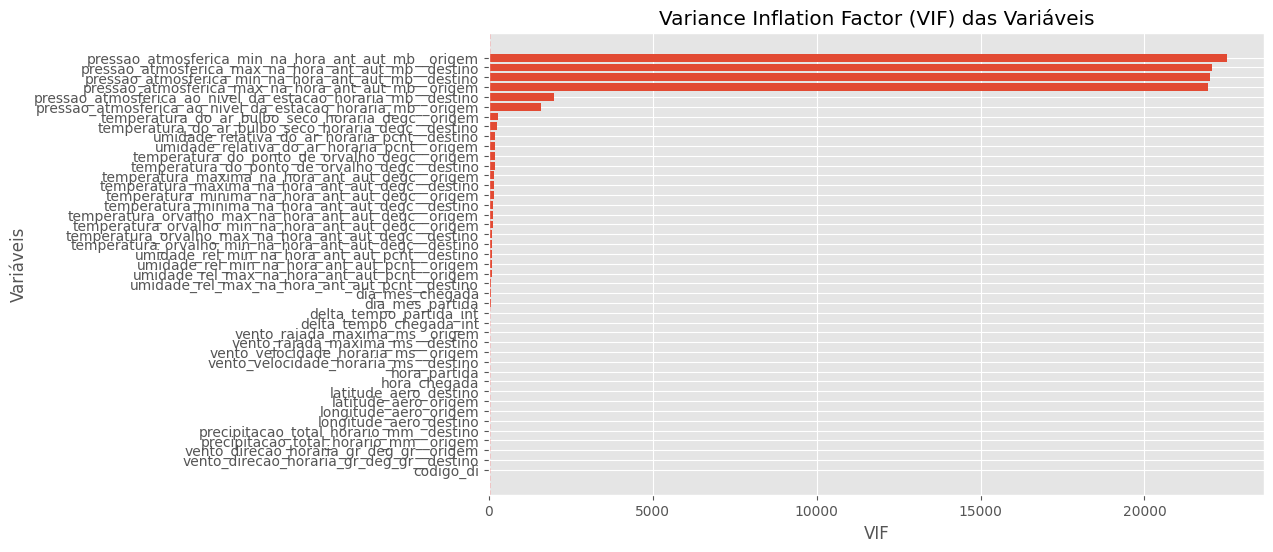

feature           VIF
14  pressao_atmosferica_min_na_hora_ant_aut_mb__or...  22518.380565
29  pressao_atmosferica_max_na_hora_ant_aut_mb__de...  22067.669499
30  pressao_atmosferica_min_na_hora_ant_aut_mb__de...  21985.846856
13  pressao_atmosferica_max_na_hora_ant_aut_mb__or...  21953.600448
28  pressao_atmosferica_ao_nivel_da_estacao_horari...   1987.391436
12  pressao_atmosferica_ao_nivel_da_estacao_horari...   1592.314574
15  temperatura_do_ar_bulbo_seco_horaria_degc__origem    269.225960
31  temperatura_do_ar_bulbo_seco_horaria_degc__des...    246.014254
39       umidade_relativa_do_ar_horaria_pcnt__destino    189.327840
23        umidade_relativa_do_ar_horaria_pcnt__origem    188.135332
16       temperatura_do_ponto_de_orvalho_degc__origem    183.048488
32      temperatura_do_ponto_de_orvalho_degc__destino    180.621660
17    temperatura_maxima_na_hora_ant_aut_degc__origem    167.327731
33   temperatura_maxima_na_hora_ant_aut_degc__destino    154.000737
18    temperatura_minima_na_hora_ant_aut_degc__origem    140.586564
34   temperatura_minima_na_hora_ant_aut_degc__destino    124.853970
19  temperatura_orvalho_max_na_hora_ant_aut_degc__...    110.841974
20  temperatura_orvalho_min_na_hora_ant_aut_degc__...    109.854430
35  temperatura_orvalho_max_na_hora_ant_aut_degc__...    106.953230
36  temperatura_orvalho_min_na_hora_ant_aut_degc__...    103.501278
38      umidade_rel_min_na_hora_ant_aut_pcnt__destino     99.186584
22       umidade_rel_min_na_hora_ant_aut_pcnt__origem     95.471657
21       umidade_rel_max_na_hora_ant_aut_pcnt__origem     82.886923
37      umidade_rel_max_na_hora_ant_aut_pcnt__destino     78.427686
5                                     dia_mes_chegada     56.563909
3                                     dia_mes_partida     56.560427
1                             delta_tempo_partida_int     27.682715
2                             delta_tempo_chegada_int     27.669840
25                     vento_rajada_maxima_ms__origem      3.825258
41                    vento_rajada_maxima_ms__destino      3.632055
26                vento_velocidade_horaria_ms__origem      3.463810
42               vento_velocidade_horaria_ms__destino      3.280674
4                                        hora_partida      2.040767
6                                        hora_chegada      1.871778
9                               latitude_aero_destino      1.793689
7                                latitude_aero_origem      1.784007
8                               longitude_aero_origem      1.288786
10                             longitude_aero_destino      1.280614
27             precipitacao_total_horario_mm__destino      1.148320
11              precipitacao_total_horario_mm__origem      1.141692
24            vento_direcao_horaria_gr_deg_gr__origem      1.020709
40           vento_direcao_horaria_gr_deg_gr__destino      1.018676
0                                           codigo_di      1.001713

In [30]:
calculate_vif(df)

### Correlaçao

#### Pearson

In [39]:
def heatmap_correlacao_pearson(df: pd.DataFrame, annot: bool = True, figsize: tuple = (25, 25)):
    """
    Calcula a matriz de correlação de Pearson entre as variáveis numéricas de um DataFrame e
    gera um heatmap para visualização.

    Parâmetros:
    -----------
    df : pd.DataFrame
        O DataFrame que contém os dados.
    annot : bool, opcional
        Se True, exibe os valores das correlações no heatmap. O padrão é True.
    figsize : tuple, opcional
        Tamanho da figura do heatmap. O padrão é (10, 8).

    Retorna:
    --------
    None
        Exibe o heatmap da correlação de Pearson.
    """
    
    # Selecionar apenas colunas numéricas
    df_numerico = df.select_dtypes(include=['float64', 'int64'])
    
    if df_numerico.empty:
        raise ValueError("Não há colunas numéricas no DataFrame para calcular a correlação.")
    
    # Calcular a matriz de correlação de Pearson
    matriz_correlacao = df_numerico.corr(method='pearson')
    
    # Gerar o heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(matriz_correlacao, annot=annot, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
    plt.title('Heatmap de Correlação de Pearson')
    plt.show()

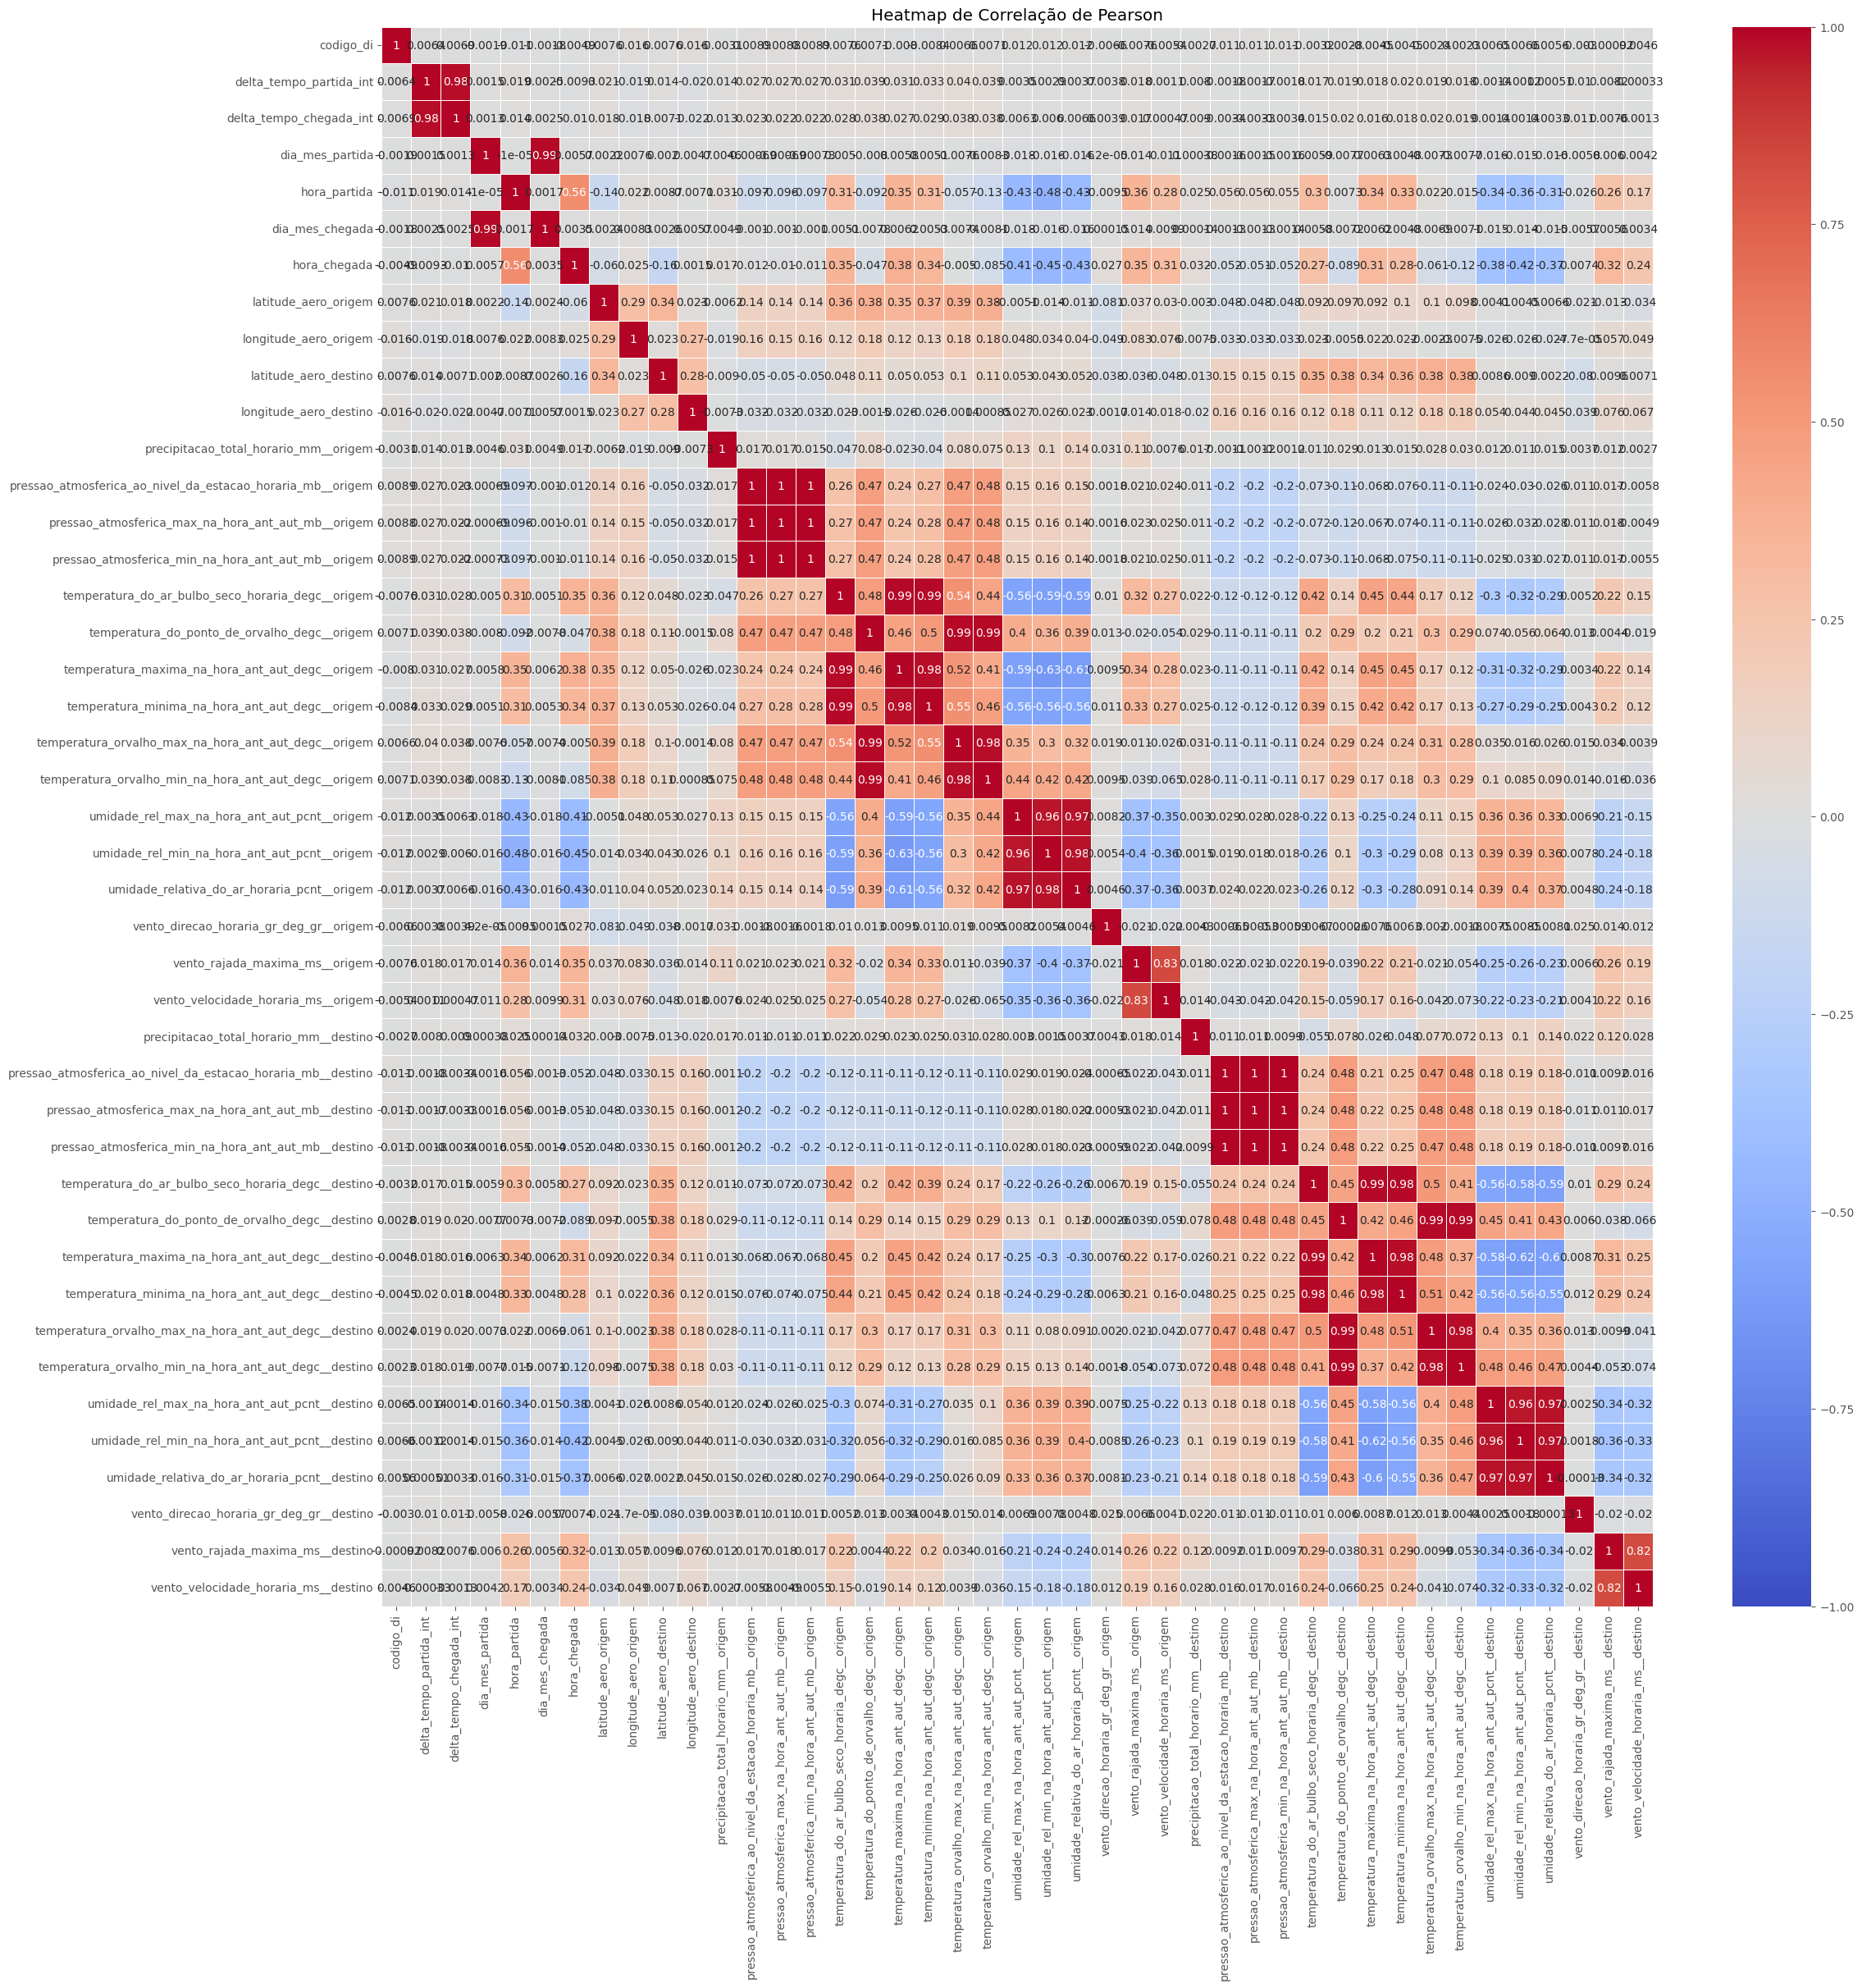

In [40]:
# Exemplo de como usar a função
heatmap_correlacao_pearson(df)

#### Spearman 

In [41]:
def heatmap_correlacao_spearman(df: pd.DataFrame, annot: bool = True, figsize: tuple = (25, 25)):
    """
    Calcula a matriz de correlação de Spearman entre as variáveis numéricas de um DataFrame e
    gera um heatmap para visualização.

    Parâmetros:
    -----------
    df : pd.DataFrame
        O DataFrame que contém os dados.
    annot : bool, opcional
        Se True, exibe os valores das correlações no heatmap. O padrão é True.
    figsize : tuple, opcional
        Tamanho da figura do heatmap. O padrão é (10, 8).

    Retorna:
    --------
    None
        Exibe o heatmap da correlação de Spearman.
    """
    
    # Selecionar apenas colunas numéricas
    df_numerico = df.select_dtypes(include=['float64', 'int64'])
    
    if df_numerico.empty:
        raise ValueError("Não há colunas numéricas no DataFrame para calcular a correlação.")
    
    # Calcular a matriz de correlação de Spearman
    matriz_correlacao = df_numerico.corr(method='spearman')
    
    # Gerar o heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(matriz_correlacao, annot=annot, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.2)
    plt.title('Heatmap de Correlação de Spearman')
    plt.show()

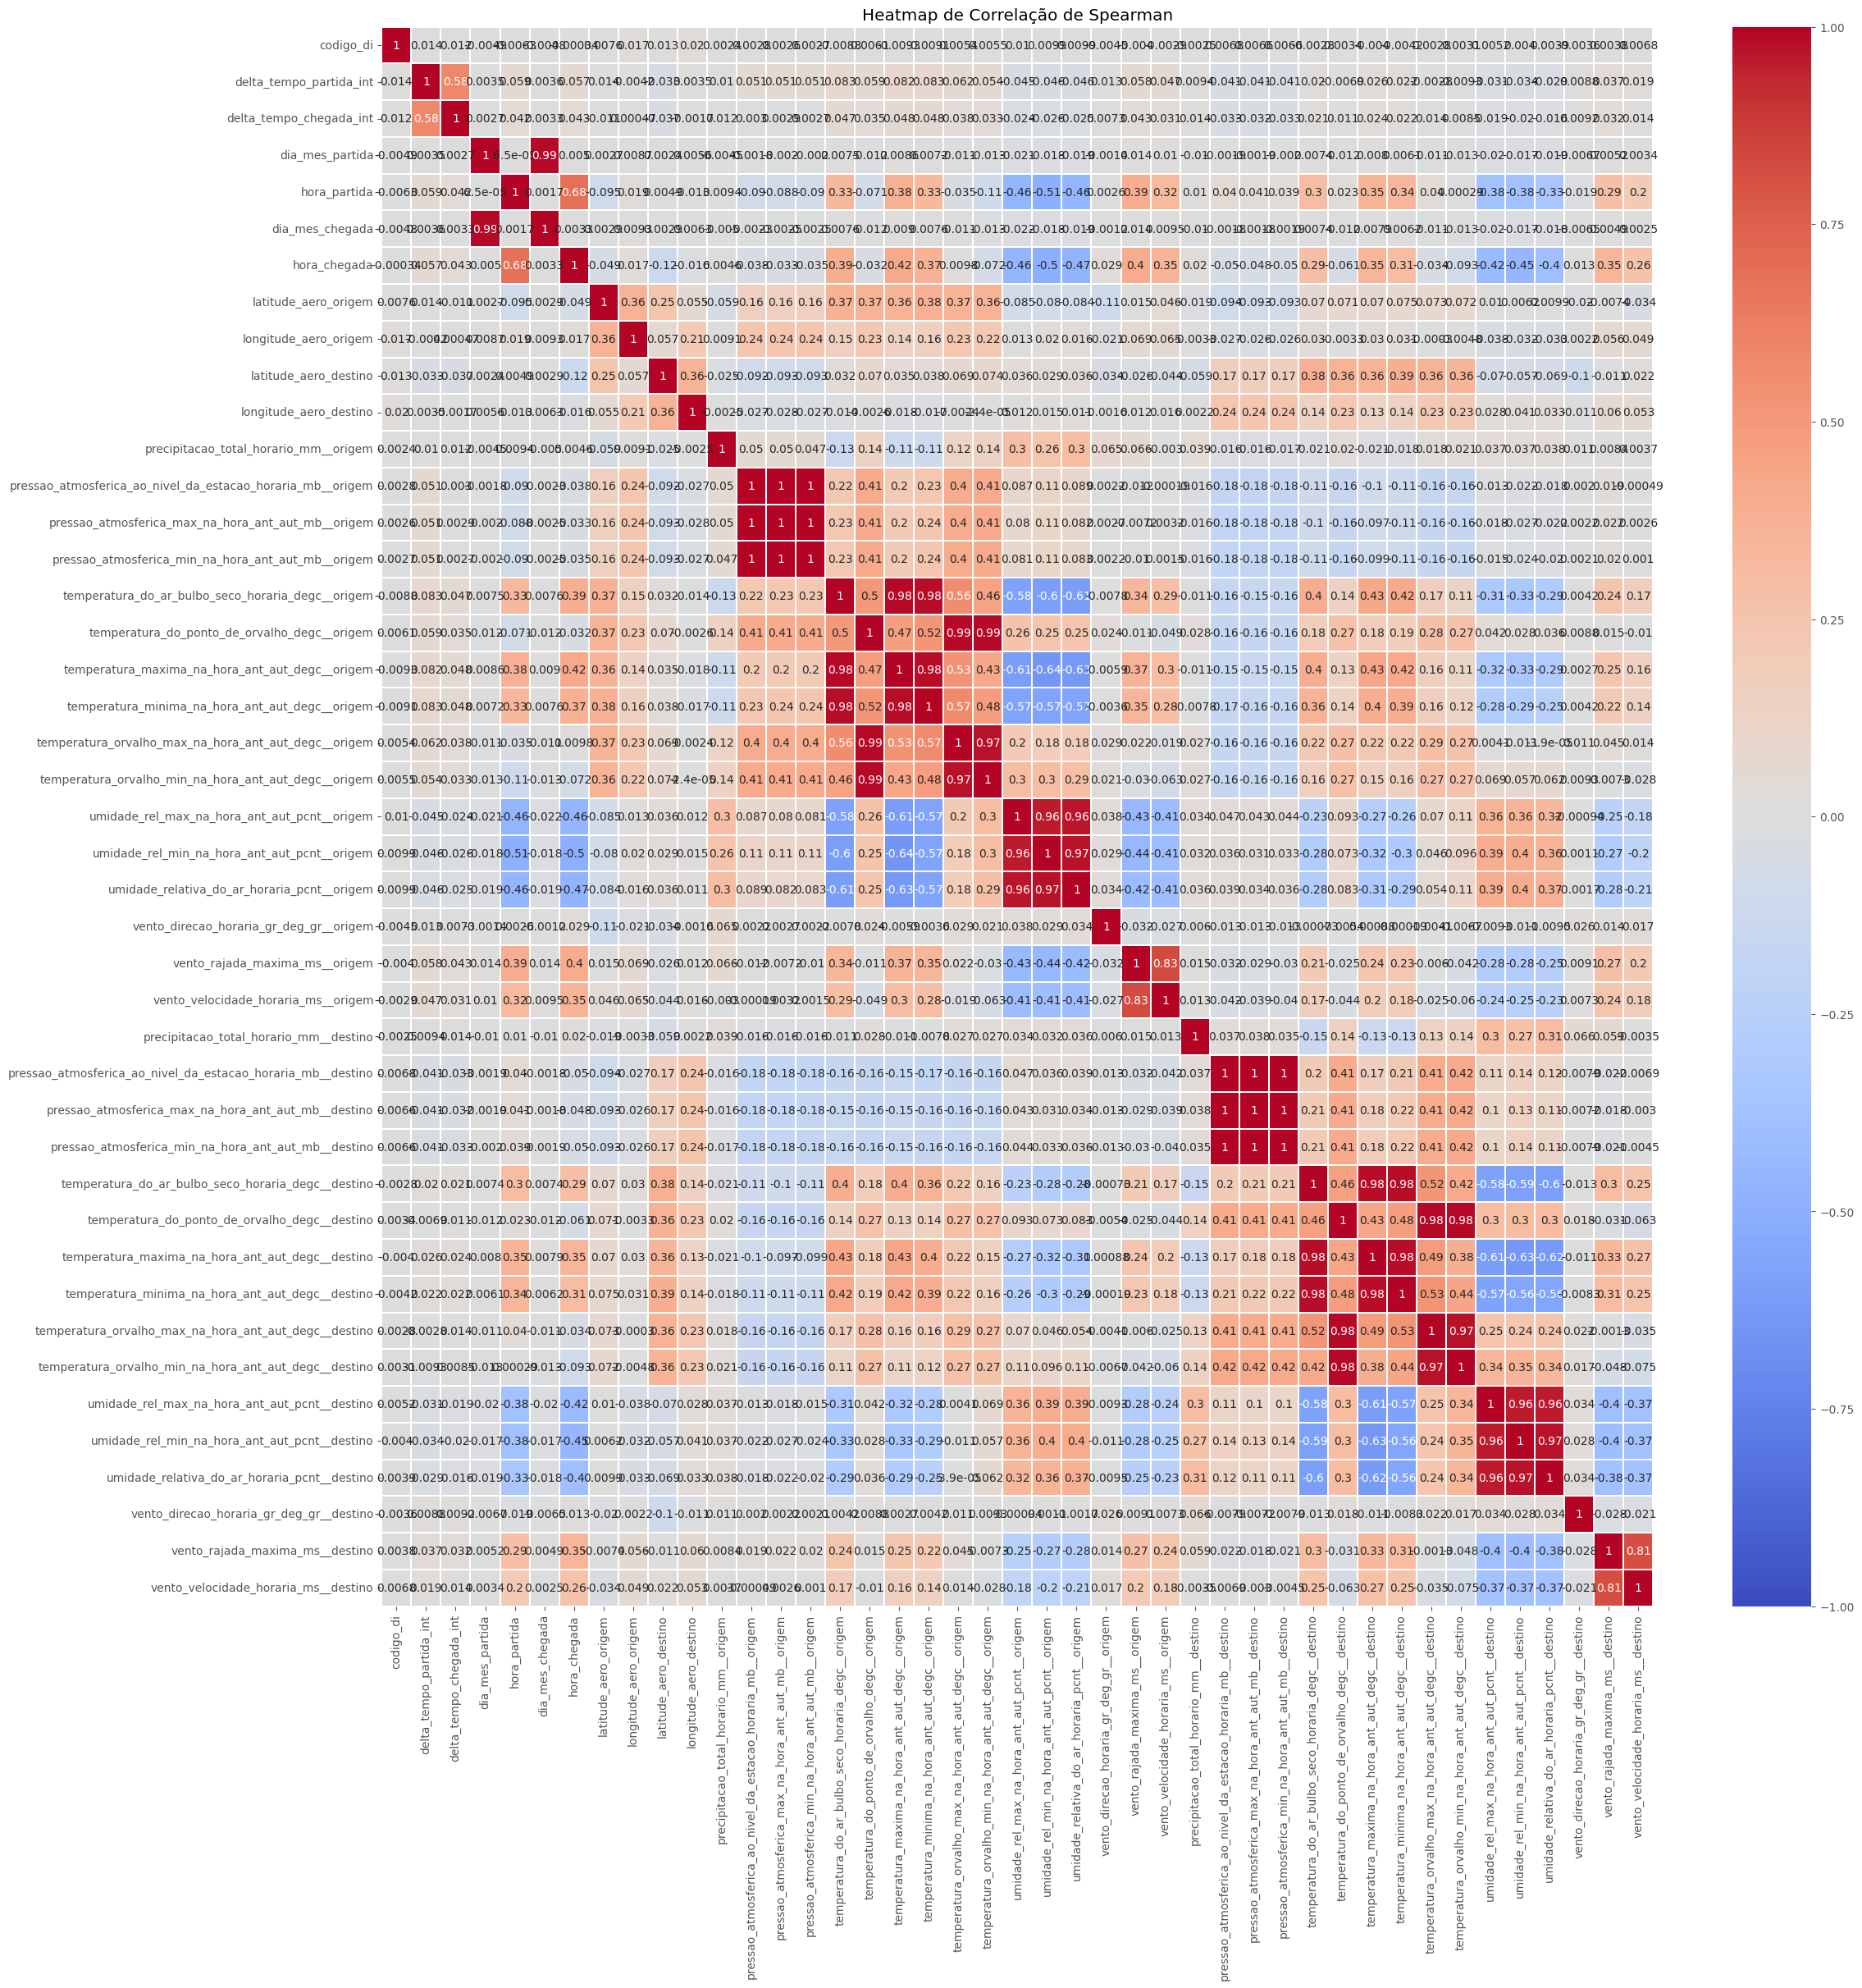

In [42]:
# Exemplo de como usar a função
heatmap_correlacao_spearman(df)

### PCA

In [45]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import (
    VarianceThreshold, RFE, SelectFromModel, SequentialFeatureSelector, mutual_info_classif, mutual_info_regression
)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.inspection import permutation_importance
from sklearn.neighbors import KDTree
from sklearn.tree import DecisionTreeClassifier
from boruta import BorutaPy

In [46]:
def plot_scree_plot(explained_variance, title):
    """
    Cria um gráfico de tela (Scree Plot) para visualizar a variância explicada por cada componente principal.

    Args:
    explained_variance (list): Lista da variância explicada por cada componente principal.
    title (str): Título do gráfico.

    Etapas:
    1. Configurar a figura com tamanho específico.
    2. Criar rótulos para o eixo x correspondendo a cada componente principal.
    3. Plotar a variância explicada em função dos componentes principais.
    4. Adicionar uma linha horizontal representando a regra de Kaiser (média da variância explicada).
    5. Definir rótulos para os eixos x e y, e título do gráfico.
    6. Adicionar legenda e exibir o gráfico.
    """
    plt.figure(figsize=(30, 30))

    # Criando labels para o eixo x
    x_labels = [f'PC{i}' for i in range(1, len(explained_variance) + 1)]

    # Plotando o gráfico
    plt.plot(x_labels, explained_variance, marker='o', linestyle='--')

    # Calculando a média da variância explicada para a regra de Kaiser
    kaiser_rule_threshold = np.mean(explained_variance)

    # Adicionando a linha horizontal para a regra de Kaiser
    plt.axhline(y=kaiser_rule_threshold, color='r', linestyle='dashed', label=f'Kaiser rule (mean={kaiser_rule_threshold:.2f})')

    # Definindo os labels do eixo x
    plt.xticks(x_labels)

    plt.title(f'Scree Plot - {title}')
    plt.xlabel('Principal Components')
    plt.ylabel('Variance Explained')

    # Adicionando legenda
    plt.legend()

    plt.show()

def plot_loadings(loadings, title):
    """
    Cria um gráfico de barras para visualizar os pesos (loadings) de cada componente principal.

    Args:
    loadings (DataFrame): DataFrame contendo os pesos dos componentes principais.
    title (str): Título do gráfico.

    Etapas:
    1. Utilizar a função plot do DataFrame para criar um gráfico de barras.
    2. Configurar tamanho, título e rótulos dos eixos.
    3. Exibir o gráfico.
    """
    loadings.plot(kind='bar', figsize=(30, 30))
    plt.title(f'PCA Loadings - {title}')
    plt.ylabel('Loading Value')
    plt.xlabel('Principal Component')
    plt.show()

def plot_loadings_heatmap(loadings, component_labels, variable_labels):
    """
    Cria um mapa de calor para visualizar os pesos (loadings) dos componentes principais em relação às variáveis originais.

    Args:
    loadings (DataFrame): DataFrame contendo os pesos dos componentes principais.
    component_labels (list): Lista de rótulos para os componentes principais.
    variable_labels (list): Lista de rótulos para as variáveis originais.

    Etapas:
    1. Configurar a figura com tamanho específico.
    2. Utilizar a função heatmap do Seaborn para criar o mapa de calor.
    3. Configurar rótulos, título e exibir o gráfico.
    """
    plt.figure(figsize=(30, 30))
    sns.heatmap(loadings, annot=True, cmap='viridis', fmt='.2f',
                yticklabels=component_labels, xticklabels=variable_labels)
    plt.title('PCA Loadings')
    plt.ylabel('Principal Component')
    plt.xlabel('Variable')
    plt.show()

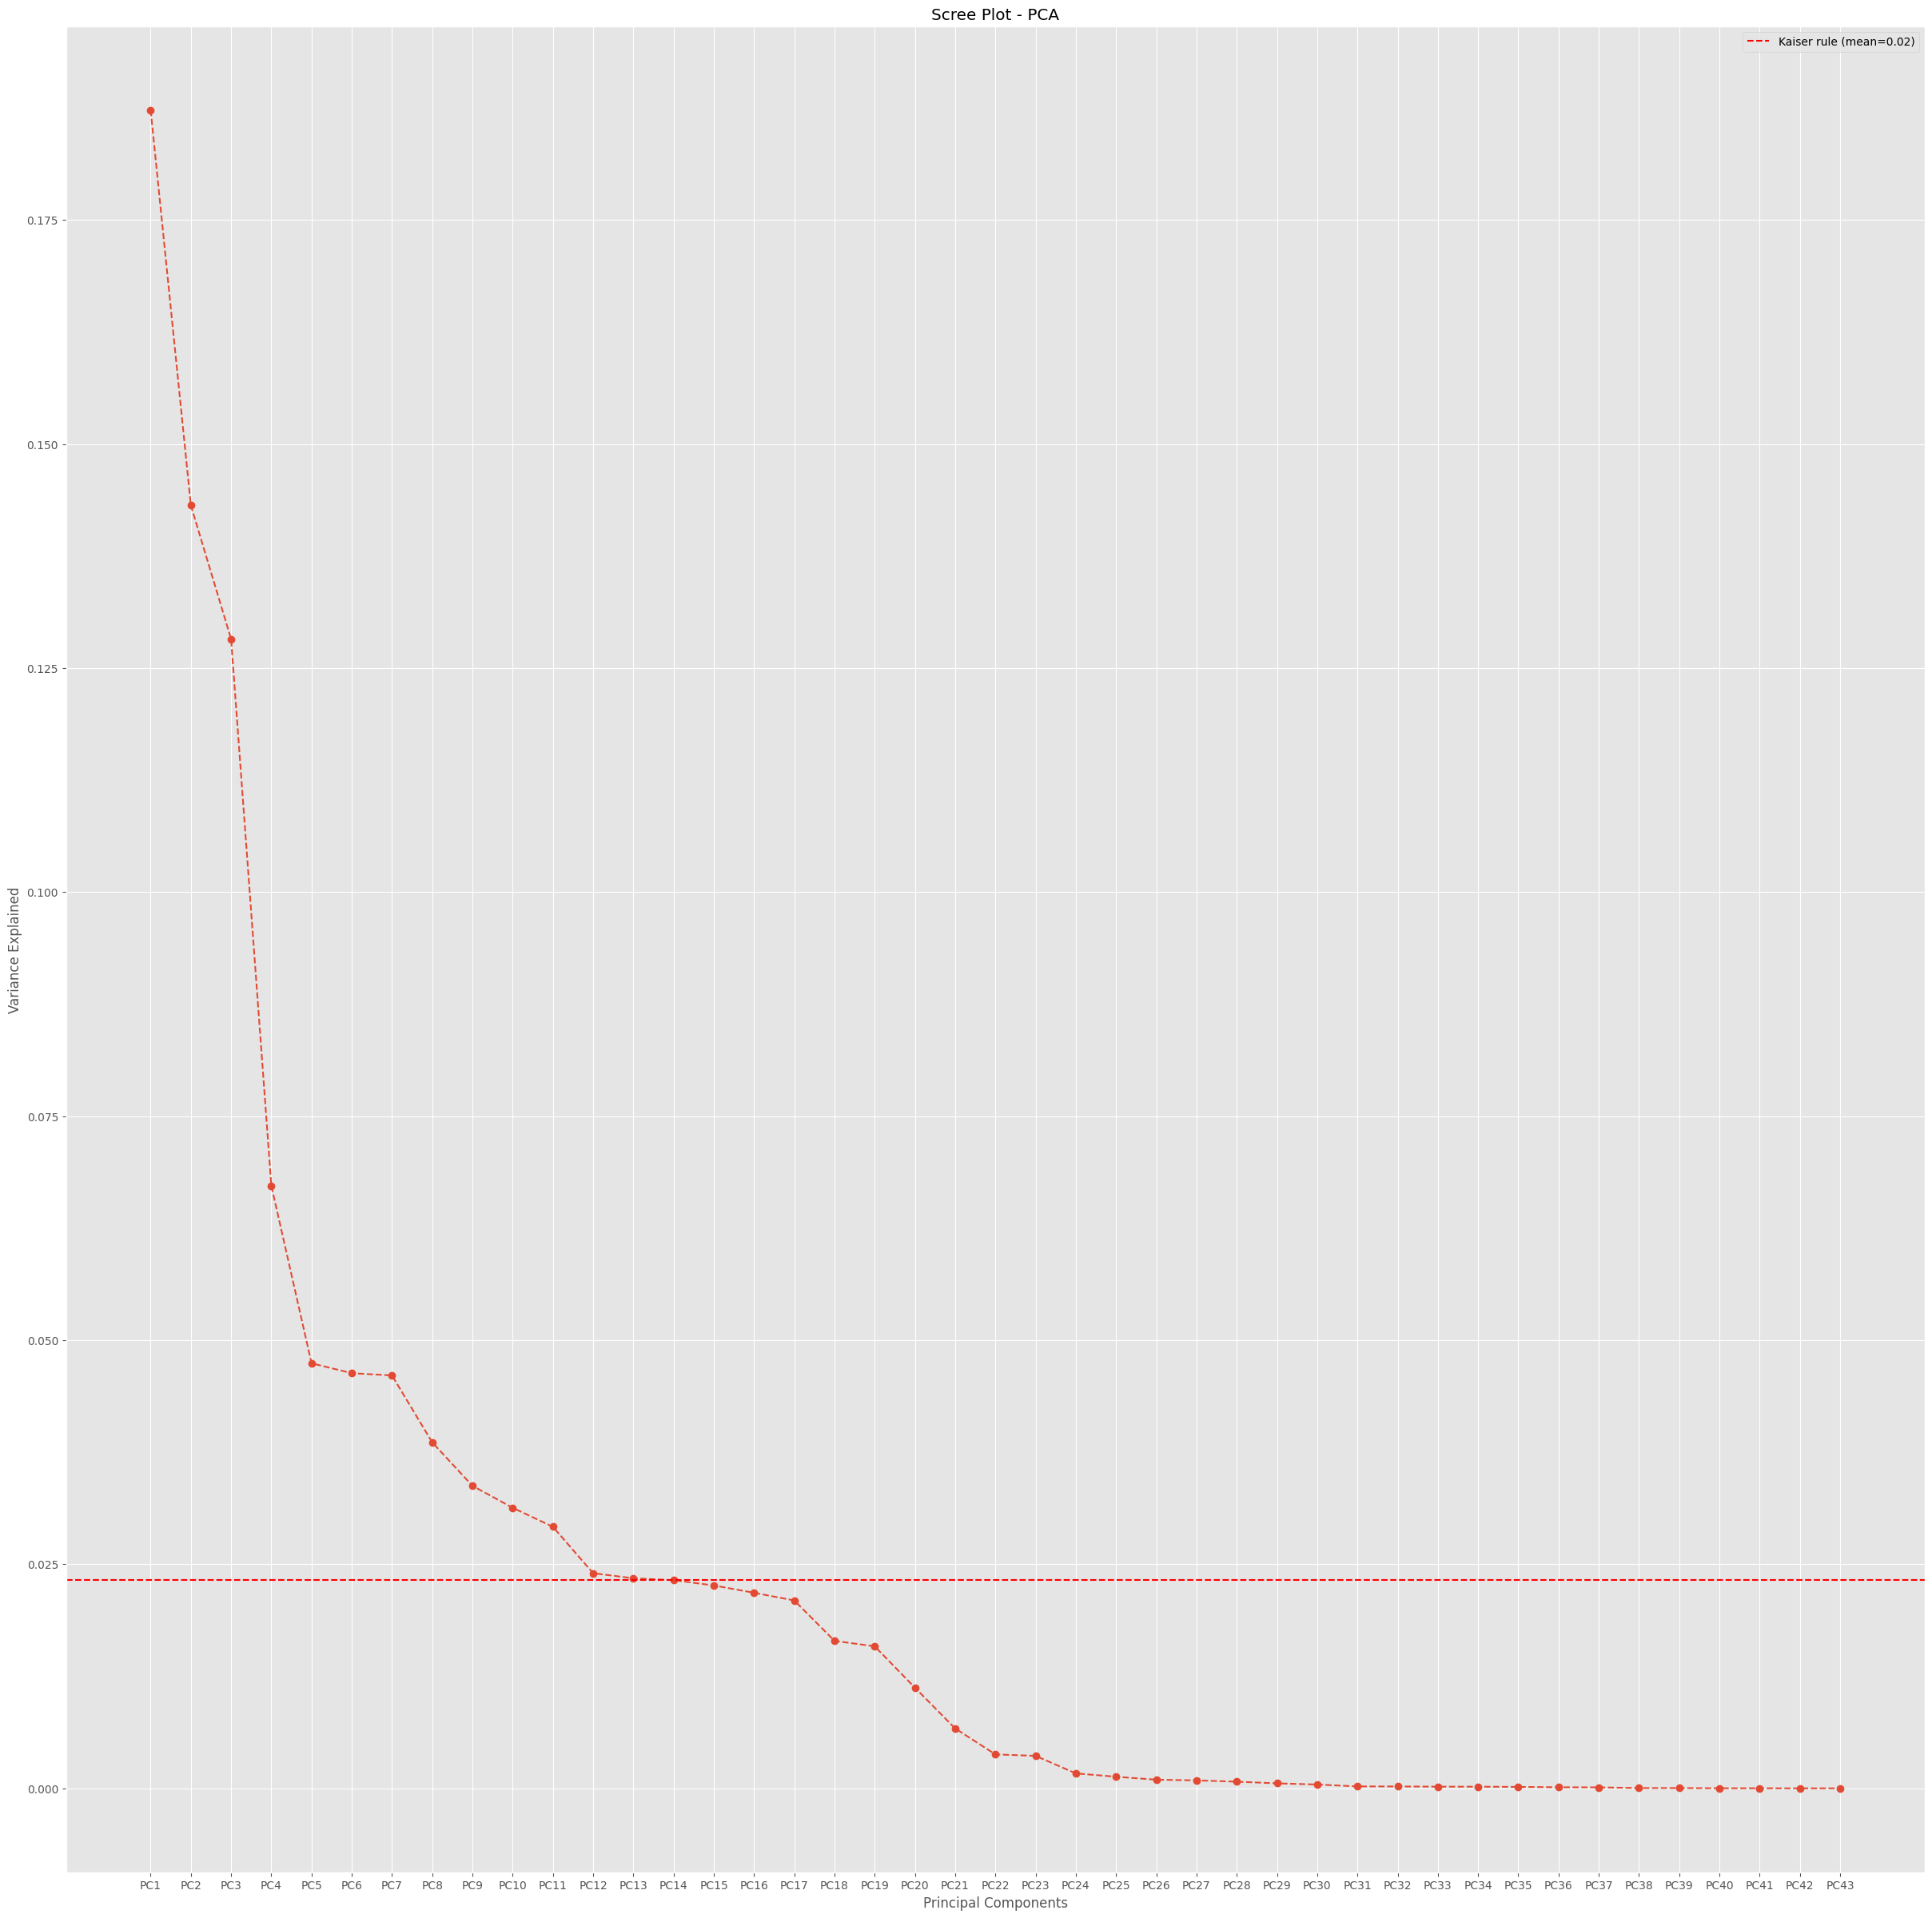

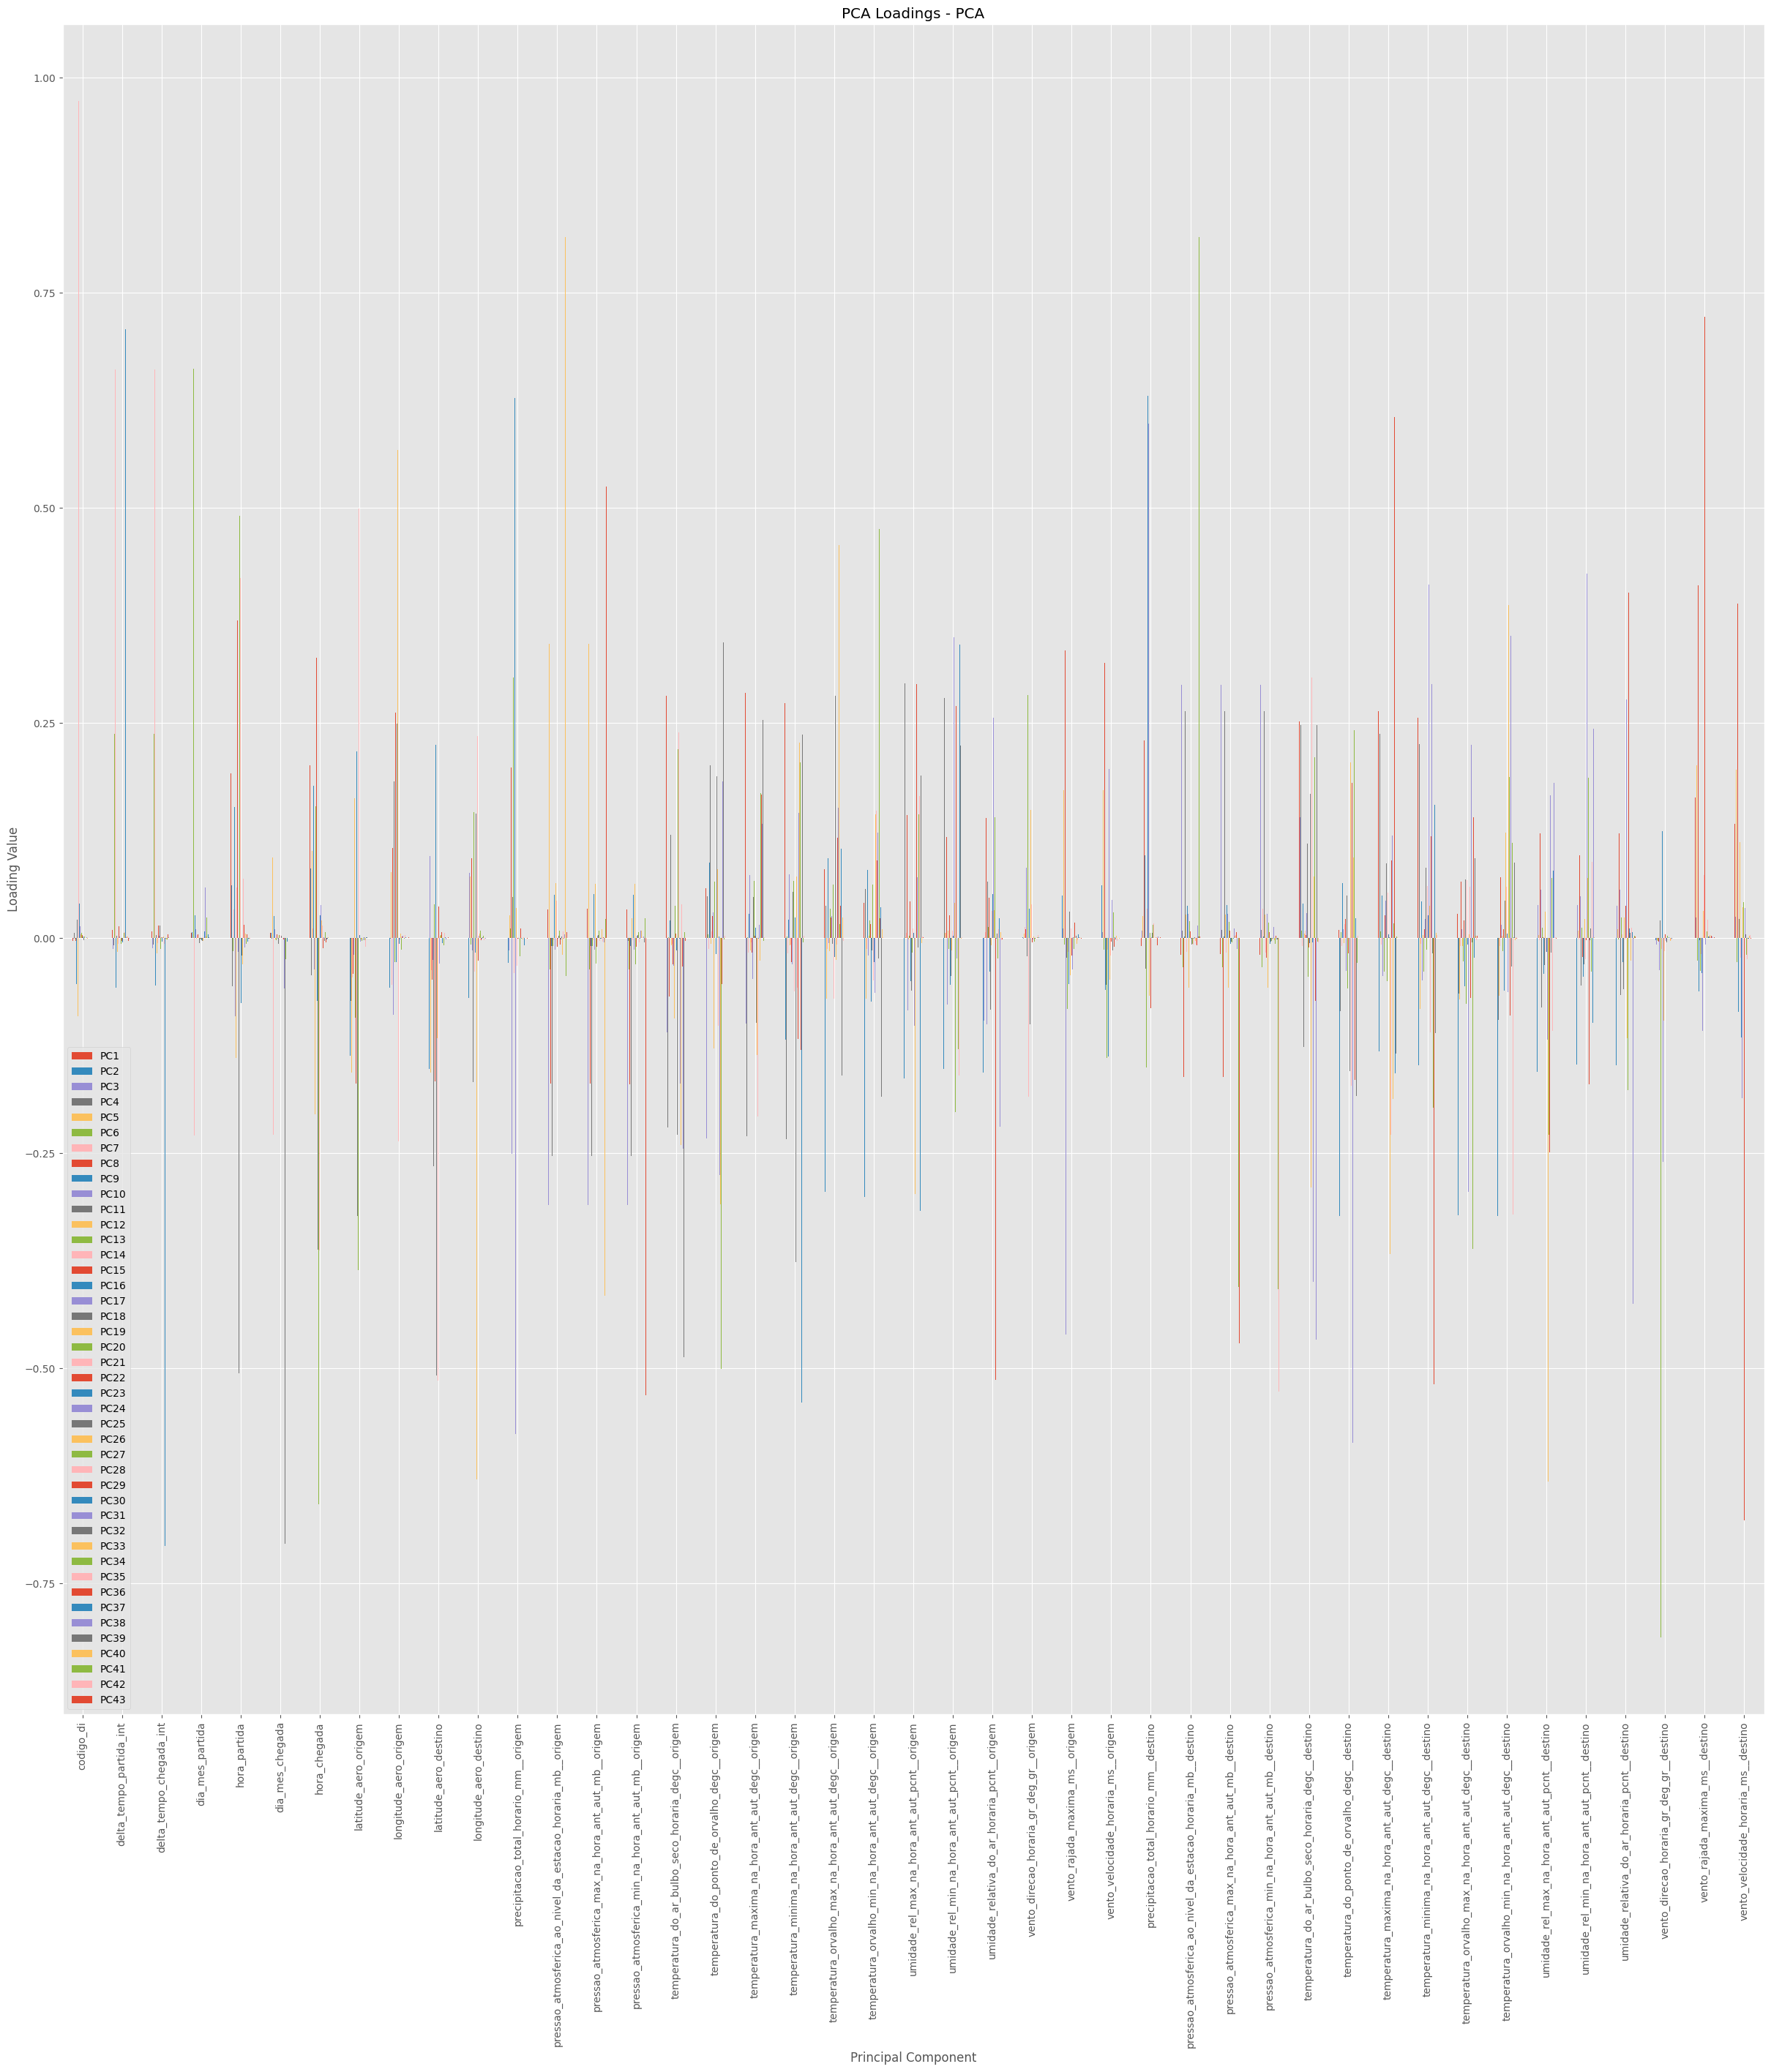

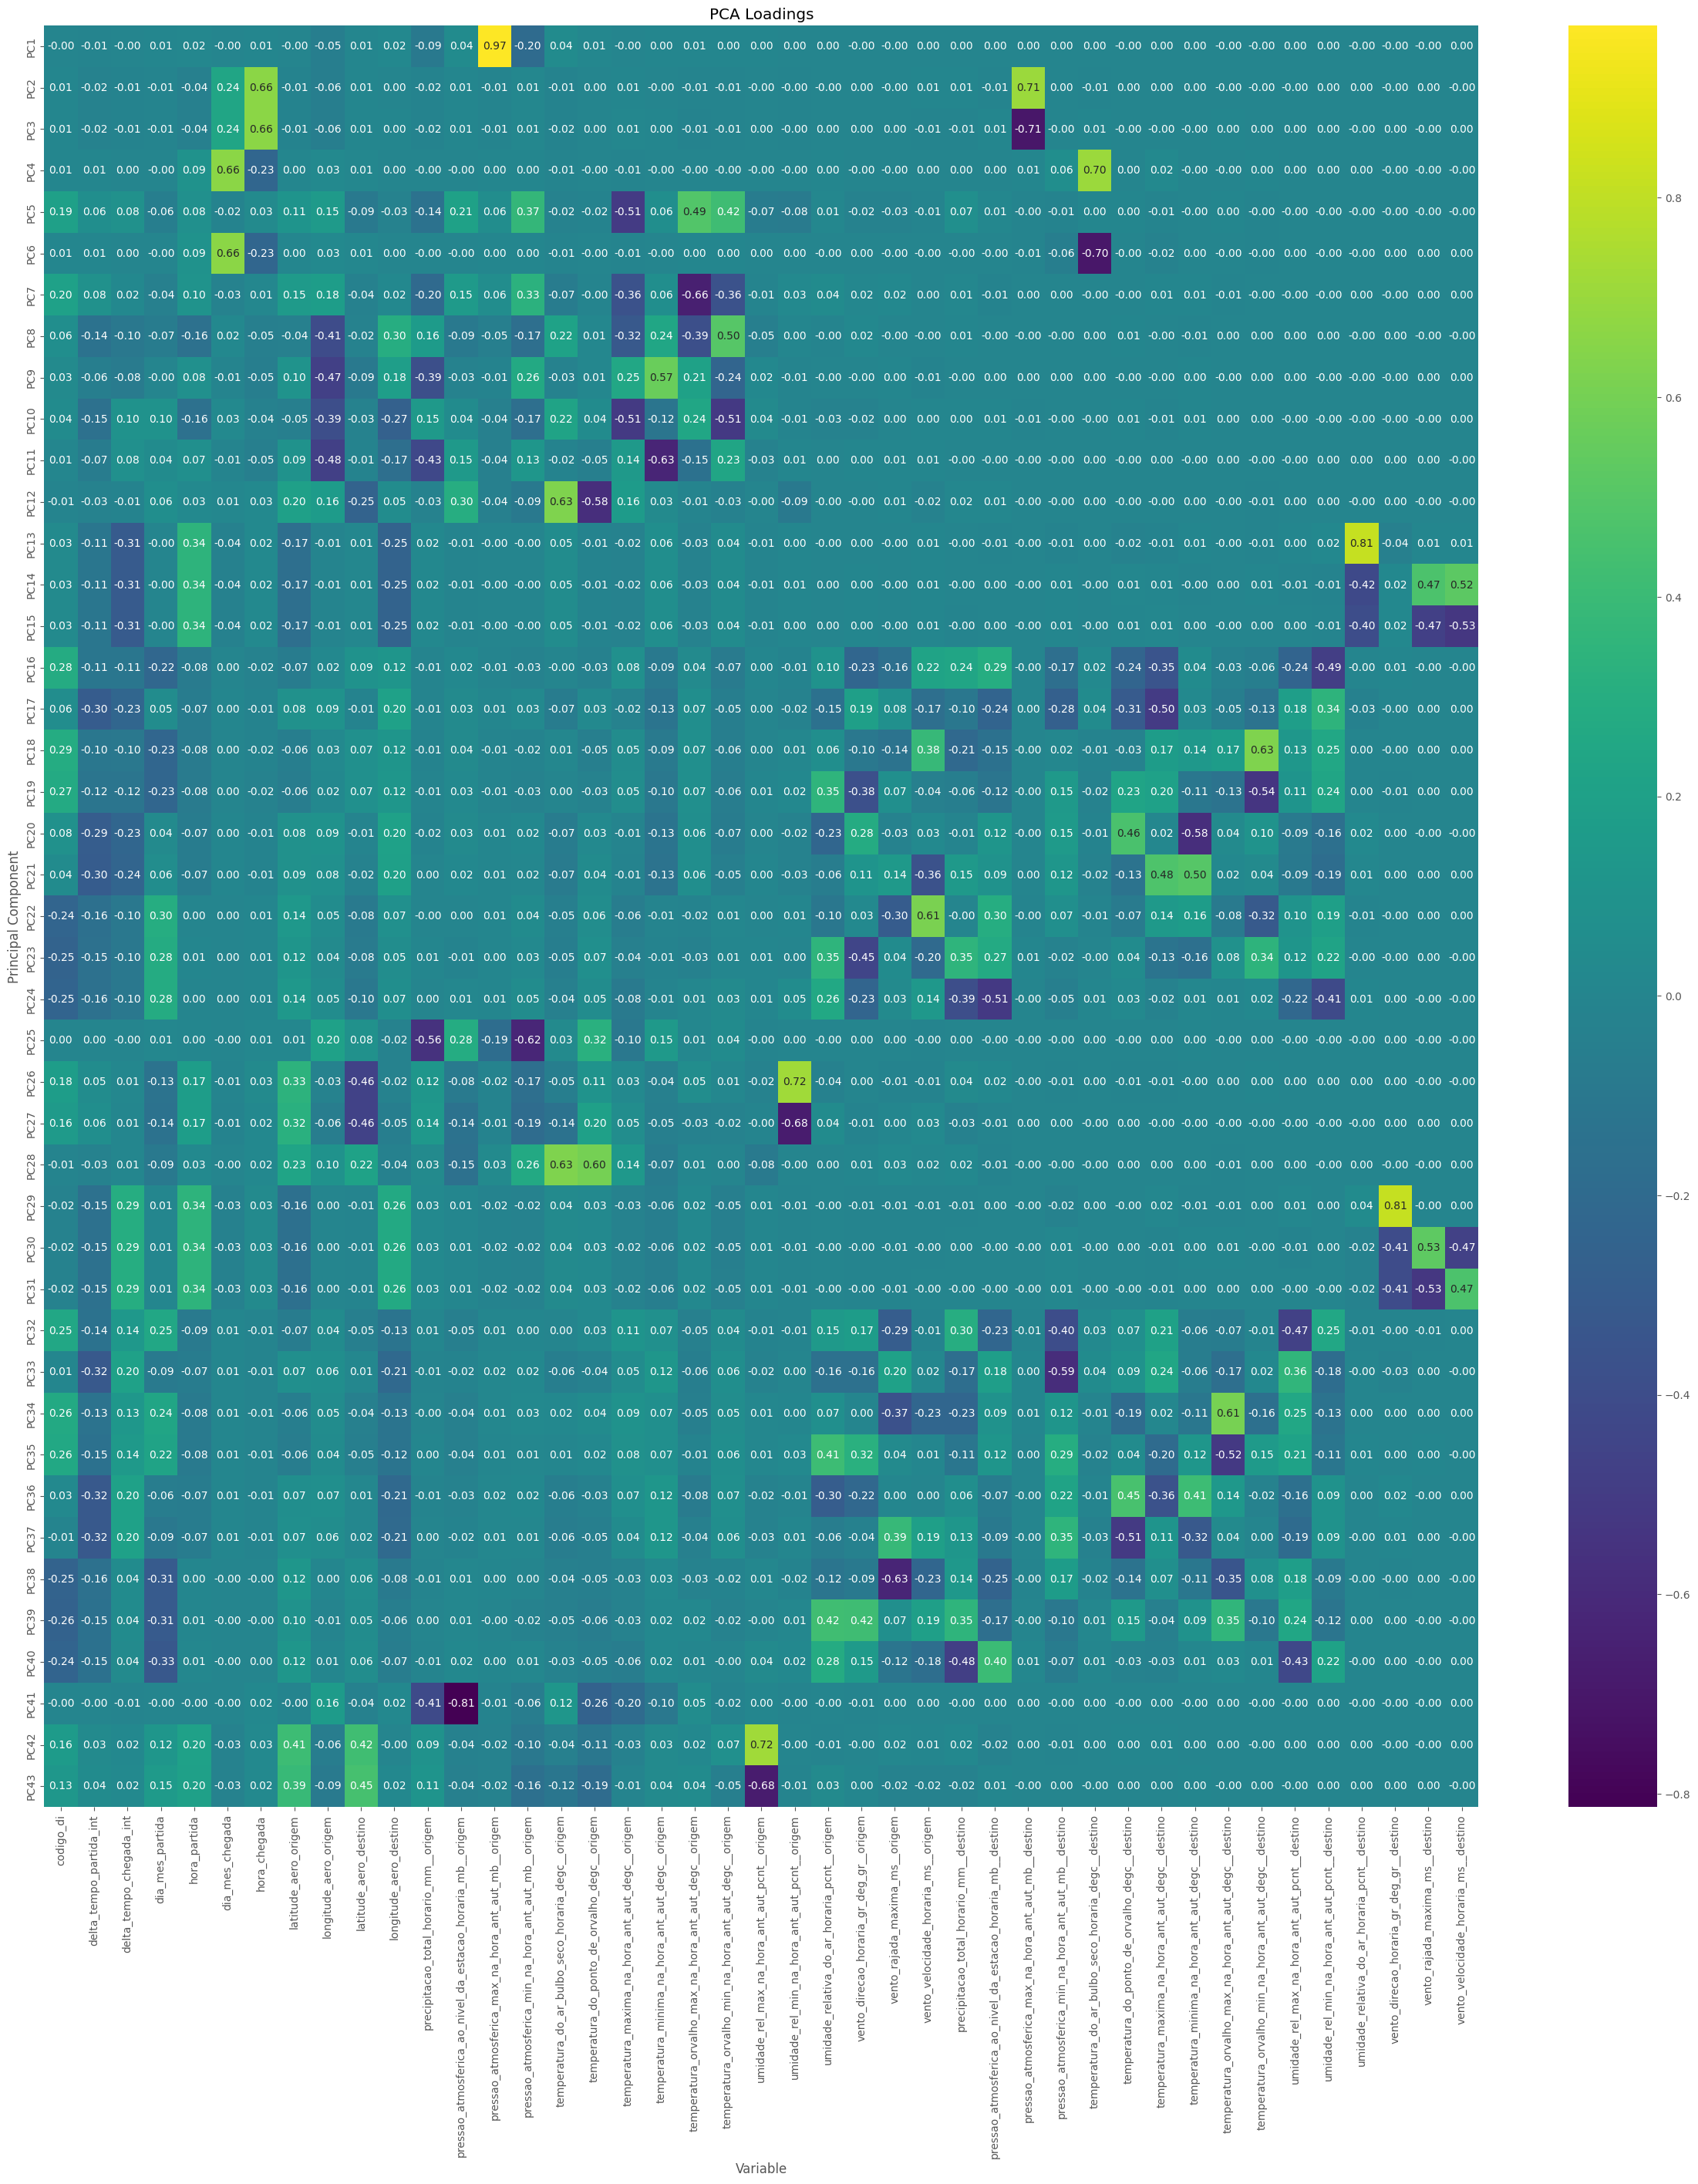

In [47]:
# Substitua 'df' pelo seu DataFrame
# Selecionando colunas numéricas
colunas_numericas = df.select_dtypes(include=['float64', 'int64', 'int32']).columns
df_numeric = df[colunas_numericas]

# Padronizando os dados
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Aplicando a PCA
pca = PCA()
componentes_principais = pca.fit_transform(df_scaled)

# Variância explicada por cada componente
explained_variance = pca.explained_variance_ratio_

# Loadings são os coeficientes dos componentes principais
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(len(df_numeric.columns))], index=df_numeric.columns)

# Agora, chamando as funções para gerar os gráficos
plot_scree_plot(explained_variance, 'PCA')
plot_loadings(loadings, 'PCA')
plot_loadings_heatmap(loadings, loadings.columns, loadings.index)


## Algoritmos

###  Pre-treino para feature selection

In [48]:
df_feature = df[['nome_empresas','descricao_origem','descricao_destino','pais_origem','pais_destino','continente_origem',
                 'continente_destino','cidade_origem','cidade_destino','uf_origem','uf_destino','mes_partida','mes_chegada',
                 'dia_semana_partida','dia_semana_chegada','status_do_voo']]

# Seleção das features(variaveis) preditoras
dt_ax = df_feature.drop(columns = ['status_do_voo'])

# Seleção da variavel a ser predita a probabilidade
dt_ay = df_feature[['status_do_voo']].copy()

label_encoder = LabelEncoder()
dt_ay = label_encoder.fit_transform(dt_ay)

list_dummies = ['nome_empresas','descricao_origem','descricao_destino','pais_origem','pais_destino','continente_origem',
                 'continente_destino','cidade_origem','cidade_destino','uf_origem','uf_destino','mes_partida','mes_chegada',
                 'dia_semana_partida','dia_semana_chegada']

dt_ax_dummies = pd.get_dummies(dt_ax, columns=list_dummies, dummy_na=True)

# Segmentação em Treino (75%) e Teste (25%)
X_train_hot, X_test_hot, y_train_hot, y_test_hot = train_test_split(dt_ax_dummies, dt_ay, random_state=42, test_size=0.25)

# Segmentação em Treino (75%) e Teste (25%)
X_train, X_test, y_train, y_test = train_test_split(dt_ax, dt_ay, random_state=42, test_size=0.25)

In [49]:
# XGBoost
model_xgb = xgb.XGBClassifier()
model_xgb.fit(X_train_hot,y_train_hot)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [57]:
# Catboost
cat_features =  list(dt_ax.select_dtypes(include=['object']))

model_ctb = ctb.CatBoostClassifier( cat_features = cat_features)
model_ctb.fit(dt_ax, dt_ay, cat_features=cat_features, verbose=False)

print('CatBoost model is fitted: ' + str(model_ctb.is_fitted()))

CatBoost model is fitted: True


### PPscore

CPU times: total: 33min 3s
Wall time: 8h 38min 18s


<Axes: >

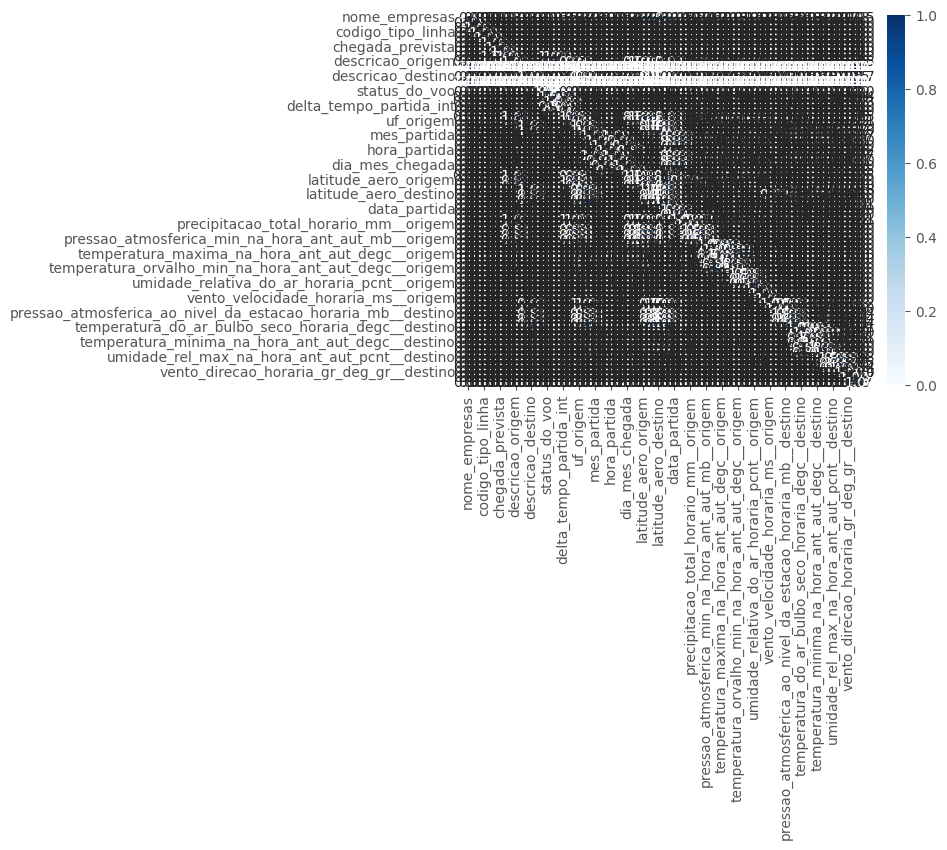

In [51]:
%%time
# Calculando e visualizando a matriz de preditividade de poder (Predictive Power Score - PPS).
# PPS é uma alternativa ao coeficiente de correlação de Pearson para medir a relação não linear entre variáveis.
# A pontuação varia de 0 (sem poder preditivo) a 1 (poder preditivo perfeito). Pode ser utilizado como alternativa à correlação (matriz).
df_matrix = pps.matrix(df)

# Criando um mapa de calor com os valores PPS.
# Valores de PPS variam de 0 a 1, onde 1 indica uma relação previsível perfeita entre duas variáveis.
sns.heatmap(df_matrix, vmin=0, vmax=1, annot=True, fmt='.2f', cmap="Blues", linewidths=0.5)

# Sobre o PPScore
# https://research.macrosynergy.com/the-predictive-power-score/
# https://pypi.org/project/ppscore/#:~:text=The%20PPS%20is%20an%20asymmetric,to%20the%20correlation%20(matrix).
# https://machinelearningknowledge.ai/predictive-power-score-vs-correlation-with-python-implementation/

### Recursive Feature Elimination

In [52]:
def engenharia_de_features_recursiva(modelo, X, y):
    """
    Aplica Recursive Feature Elimination (RFE) para selecionar as melhores features
    de acordo com a importância das variáveis no modelo fornecido.

    Parâmetros:
    -----------
    modelo : objeto do modelo
        O modelo de aprendizado de máquina a ser utilizado (pode ser qualquer modelo com `coef_` ou `feature_importances_`).
    X : pd.DataFrame ou np.array
        O conjunto de dados com as variáveis preditoras.
    y : pd.Series ou np.array
        O conjunto de dados com a variável alvo.

    Retorna:
    --------
    dict
        Um dicionário contendo:
        - 'modelo_rfe': O modelo RFE treinado.
        - 'n_features': O número de features selecionadas.
        - 'suporte': Um array booleano indicando as variáveis selecionadas.
        - 'ranking': O ranking das variáveis.
        - 'colunas_selecionadas': As colunas do DataFrame X que foram selecionadas.
    """
    
    # Aplicando RFE no modelo fornecido
    rfe = RFE(modelo)
    rfe_fit = rfe.fit(X, y)
    
    # Criando um dicionário com os resultados
    resultados_rfe = {
        'modelo_rfe': rfe_fit,
        'n_features': rfe_fit.n_features_,
        'suporte': rfe_fit.support_,
        'ranking': rfe_fit.ranking_,
        'colunas_selecionadas': X.columns[rfe_fit.support_].tolist()
    }
    
    return resultados_rfe

In [53]:
# Exemplo de uso da função
resultado_rfe = engenharia_de_features_recursiva(model_xgb, X_train_hot, y_train_hot)

# Acessando as colunas significativas
colunas_significativas_rfe = resultado_rfe['colunas_selecionadas']

In [54]:
colunas_significativas_rfe

['nome_empresas_AZUL',
 'nome_empresas_GOL',
 'nome_empresas_TAM',
 'nome_empresas_nan',
 'descricao_origem_AEROPORTO INTERNACIONAL DO RIO DE JANEIRO/GALEAO  ANTONIO CARLOS JOBIM',
 'descricao_origem_AEROPORTO REGIONAL PLINIO ALARCON',
 'descricao_origem_ALTAMIRA',
 'descricao_origem_ATLAS BRASIL CANTANHEDE',
 'descricao_origem_BAHIA - JORGE AMADO',
 'descricao_origem_BARREIRAS',
 'descricao_origem_BARTOLOMEU LISANDRO',
 'descricao_origem_BAURU/AREALVA',
 'descricao_origem_BRIGADEIRO LYSIAS RODRIGUES',
 'descricao_origem_CABO FRIO',
 'descricao_origem_CAMPO GRANDE',
 'descricao_origem_CARAJAS',
 'descricao_origem_CATARATAS',
 'descricao_origem_CONGONHAS',
 'descricao_origem_CORONEL ALTINO MACHADO',
 'descricao_origem_CRUZEIRO DO SUL',
 'descricao_origem_DEPUTADO LUIS EDUARDO MAGALHAES',
 'descricao_origem_EDUARDO GOMES',
 'descricao_origem_EIRUNEPE',
 'descricao_origem_EURICO DE AGUIAR SALLES',
 'descricao_origem_FERNANDO DE NORONHA',
 'descricao_origem_GENERAL LEITE DE CASTRO',
 'desc

In [58]:
## RFE Catboost
rfe_dict = model_ctb.select_features(X = dt_ax, 
                                     y = dt_ay, 
                                     features_for_select = '0-15',
                                     num_features_to_select = 15,
                                     steps = 2,
                                     train_final_model = False,
                                     plot = True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

The number of features selection steps (2) is greater than the number of features to eliminate (1). The number of steps was reduced to 1.


CatBoostError: C:/Go_Agent/pipelines/BuildMaster/catboost.git/catboost/libs/features_selection/select_features.cpp:73: Tested feature 15 is not present; dataset contains only 15 features

### Select From model

In [73]:
def selecao_variaveis_modelo(modelo, X_train, y_train, X_test, y_test, metric_func, metric_name="Metric", alpha=0.90) -> list:
    """
    Realiza a seleção de variáveis com base na importância das features de um modelo CatBoost, LightGBM ou XGBoost.
    Para cada limiar de importância, treina um modelo e avalia a métrica especificada.

    Parâmetros:
    -----------
    modelo : objeto treinado (CatBoost, LightGBM ou XGBoost)
        O modelo já treinado (de qualquer uma das três bibliotecas suportadas).
    X_train : pd.DataFrame ou np.array
        O conjunto de treino com as variáveis preditoras.
    y_train : pd.Series ou np.array
        O conjunto de treino com a variável alvo.
    X_test : pd.DataFrame ou np.array
        O conjunto de teste com as variáveis preditoras.
    y_test : pd.Series ou np.array
        O conjunto de teste com a variável alvo.
    metric_func : function
        A função de métrica que será usada para avaliar o modelo (ex.: accuracy_score, f1_score).
    metric_name : str, opcional
        O nome da métrica, usado para impressão no output. O padrão é 'Metric'.
    alpha : float, opcional
        O limiar de desempenho acima do qual as variáveis selecionadas serão retornadas. O padrão é 0.90.

    Retorna:
    --------
    list
        Uma lista contendo os nomes ou índices das variáveis mais importantes selecionadas pelo modelo.
    """

    # Obter importâncias das features do modelo
    if hasattr(modelo, "feature_importances_"):
        feature_importances = modelo.feature_importances_
    elif hasattr(modelo, "get_feature_importance"):
        feature_importances = modelo.get_feature_importance()
    else:
        raise ValueError("O modelo fornecido não suporta a obtenção de importâncias das features.")

    # Previsões iniciais e avaliação
    predictions = modelo.predict(X_test)
    metric_value = metric_func(y_test, predictions)
    print(f"{metric_name} inicial: {metric_value:.2f}")

    # Ordenar as importâncias das features
    thresholds = np.sort(feature_importances)
    
    variaveis_selecionadas = []
    
    # Iterar por cada limiar de importância
    for thresh in thresholds:
        # Selecionar features usando o limiar atual
        selection = SelectFromModel(modelo, threshold=thresh, prefit=True)
        select_X_train = selection.transform(X_train)

        # Verificar se o modelo é do tipo CatBoost, LightGBM ou XGBoost e treinar o modelo adequado
        if isinstance(modelo, xgb.XGBClassifier):
            selection_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', verbose=False)
        elif isinstance(modelo, lgb.LGBMClassifier):
            selection_model = lgb.LGBMClassifier()
        elif isinstance(modelo, catboost.CatBoostClassifier):
            selection_model = catboost.CatBoostClassifier(verbose=0)
        else:
            raise ValueError("O modelo fornecido não é suportado. Use CatBoost, LightGBM ou XGBoost.")

        # Treinar o modelo com as features selecionadas
        selection_model.fit(select_X_train, y_train)

        # Avaliar o modelo com as features selecionadas
        select_X_test = selection.transform(X_test)
        predictions = selection_model.predict(select_X_test)
        metric_value = metric_func(y_test, predictions)
        print(f"Thresh={thresh:.3f}, n={select_X_train.shape[1]}, {metric_name}: {metric_value:.2f}")

        # Se a métrica com o limiar atual for boa, armazenar as variáveis
        if metric_value > alpha:
            variaveis_selecionadas.append(select_X_train)

    return variaveis_selecionadas

In [74]:
variaveis_importantes_xgb = selecao_variaveis_modelo(model_xgb, X_train_hot, y_train_hot, X_test_hot, y_test_hot, accuracy_score, "Acurácia")

Acurácia inicial: 0.86
Thresh=0.000, n=416, Acurácia: 0.86
Thresh=0.000, n=416, Acurácia: 0.86
Thresh=0.000, n=416, Acurácia: 0.86
Thresh=0.000, n=416, Acurácia: 0.86
Thresh=0.000, n=416, Acurácia: 0.86
Thresh=0.000, n=416, Acurácia: 0.86
Thresh=0.000, n=416, Acurácia: 0.86
Thresh=0.000, n=416, Acurácia: 0.86
Thresh=0.000, n=416, Acurácia: 0.86
Thresh=0.000, n=416, Acurácia: 0.86
Thresh=0.000, n=416, Acurácia: 0.86
Thresh=0.000, n=416, Acurácia: 0.86
Thresh=0.000, n=416, Acurácia: 0.86
Thresh=0.000, n=416, Acurácia: 0.86
Thresh=0.000, n=416, Acurácia: 0.86
Thresh=0.000, n=416, Acurácia: 0.86
Thresh=0.000, n=416, Acurácia: 0.86
Thresh=0.000, n=416, Acurácia: 0.86
Thresh=0.000, n=416, Acurácia: 0.86
Thresh=0.000, n=416, Acurácia: 0.86
Thresh=0.000, n=416, Acurácia: 0.86
Thresh=0.000, n=416, Acurácia: 0.86
Thresh=0.000, n=416, Acurácia: 0.86
Thresh=0.000, n=416, Acurácia: 0.86
Thresh=0.000, n=416, Acurácia: 0.86
Thresh=0.000, n=416, Acurácia: 0.86
Thresh=0.000, n=416, Acurácia: 0.86
Thres

In [75]:
variaveis_importantes_xgb

[]

### Feature Importance

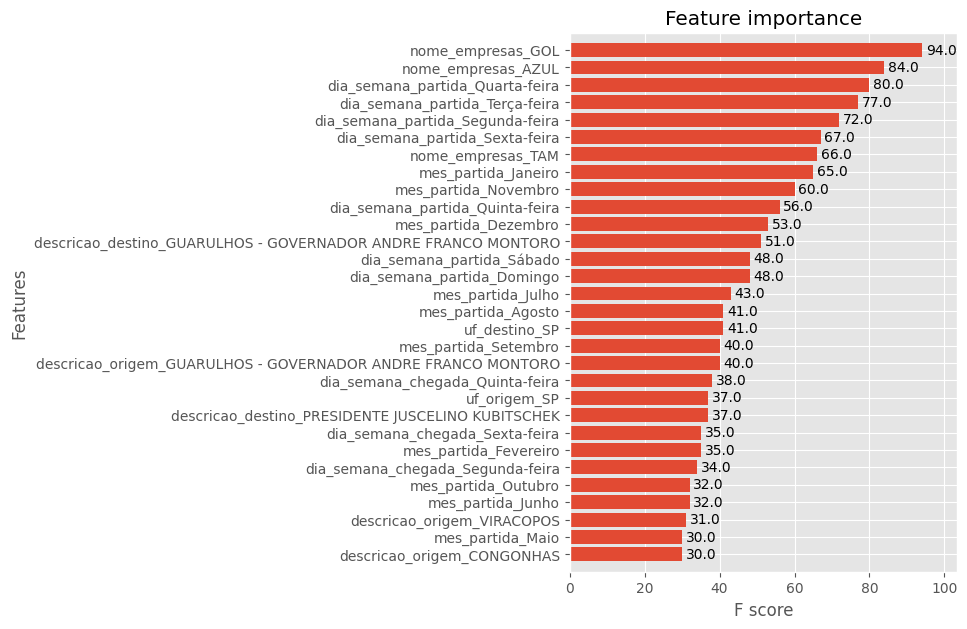

In [76]:
fig, ax = plt.subplots(figsize=(5,7))
xgb.plot_importance(model_xgb, max_num_features=30, height=0.8, ax=ax)
plt.show()

Text(0.5, 1.0, 'Feature Importance CatBoost')

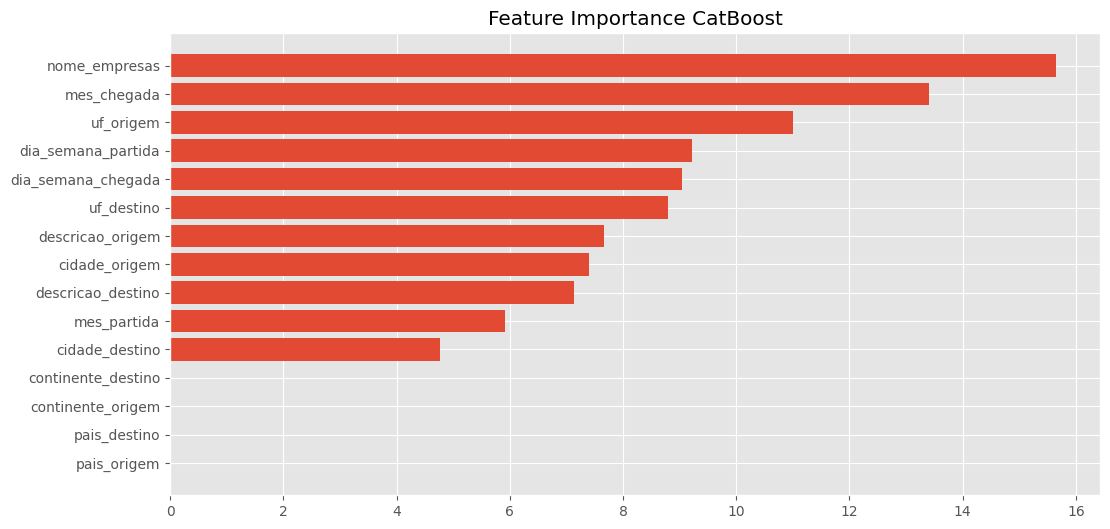

In [77]:
feature_importance = model_ctb.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance CatBoost')

### Permutation Importance

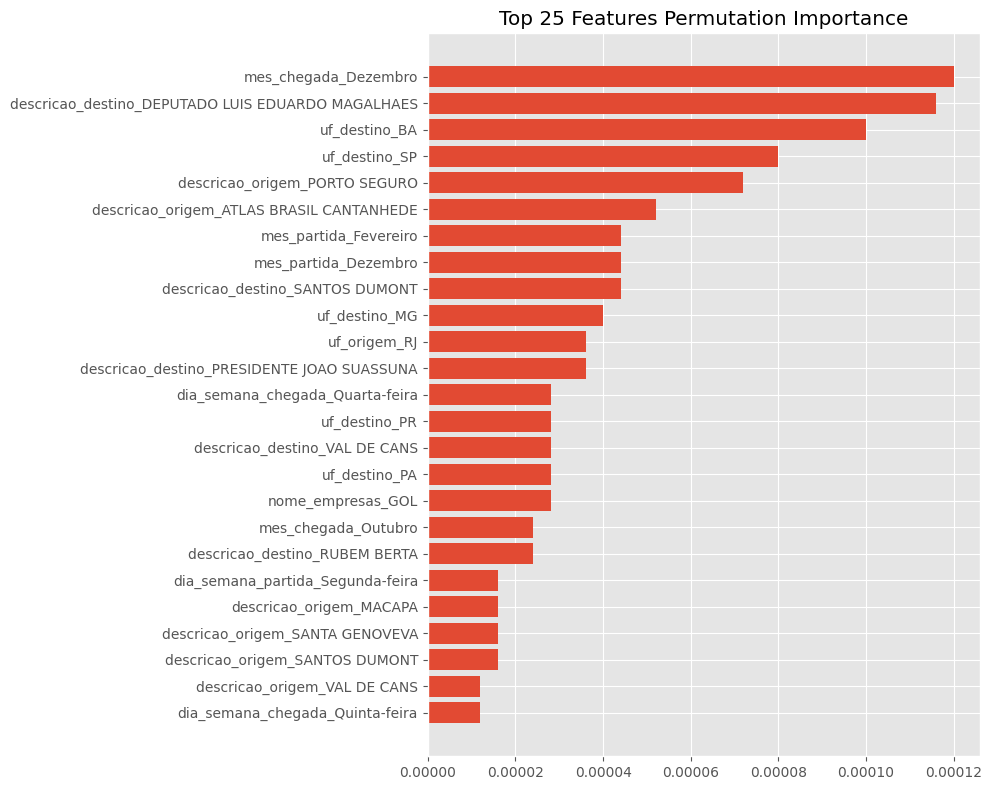

In [78]:
perm_importance = permutation_importance(model_xgb, X_test_hot, y_test_hot, n_repeats=10, random_state=123)

top_n = 25
# Ordenando as características pela importância e selecionando as top_n
sorted_idx = perm_importance.importances_mean.argsort()[-top_n:]

# Criando o gráfico de barras horizontal
plt.figure(figsize=(10, 8))  # Ajuste o tamanho conforme necessário
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')

# Definindo os y-ticks para serem os nomes das características
plt.yticks(range(len(sorted_idx)), np.array(X_test_hot.columns)[sorted_idx])

# Título do gráfico
plt.title('Top {} Features Permutation Importance'.format(top_n))

# Layout apertado para arranjo visual limpo
plt.tight_layout()

# Mostrar o gráfico
plt.show()

Text(0.5, 1.0, 'Permutation Importance')

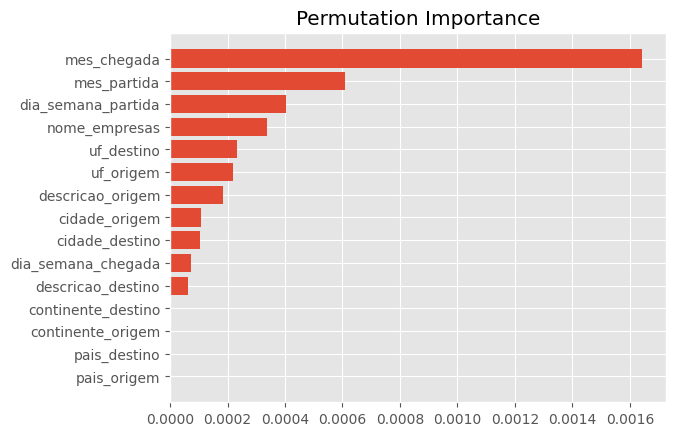

In [79]:
perm_importance = permutation_importance(model_ctb, X_test, y_test, n_repeats=10, random_state=123)
sorted_idx = perm_importance.importances_mean.argsort()
#fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Permutation Importance')

### Shap

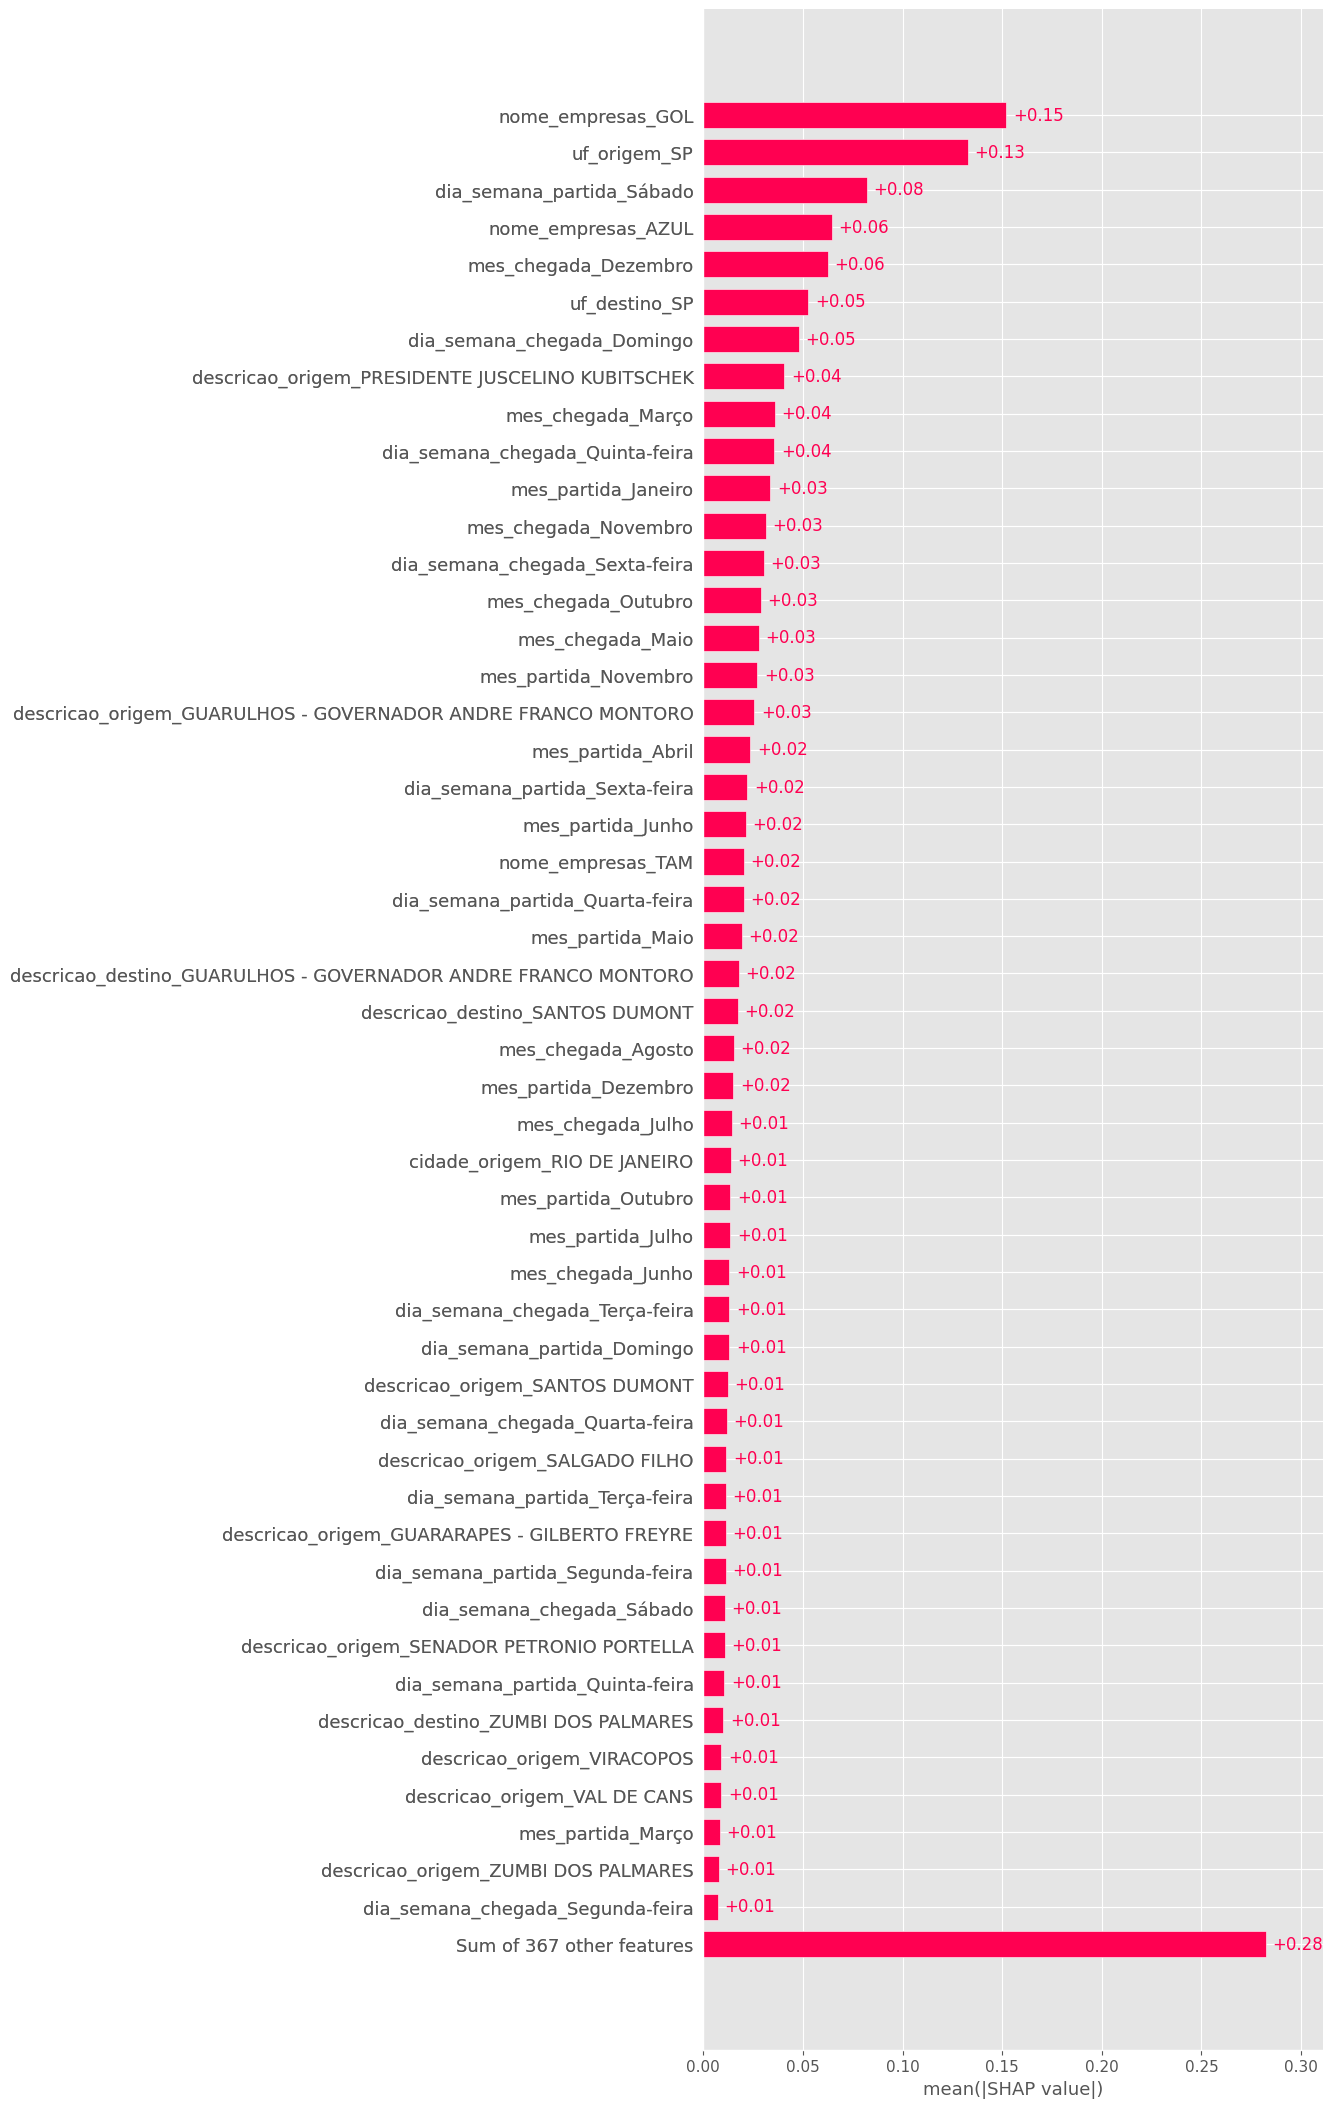

In [80]:
explainer = shap.Explainer(model_xgb)
shap_values = explainer(X_test_hot)
shap_importance = shap_values.abs.mean(0).values
sorted_idx = shap_importance.argsort()
#fig = plt.figure(figsize=(22, 21))
#plt.barh(range(len(sorted_idx)), shap_importance[sorted_idx], align='center')
#plt.yticks(range(len(sorted_idx)), np.array(X_test_hot.columns)[sorted_idx])
#plt.title('SHAP Importance')
shap.plots.bar(shap_values, max_display=50)

Text(0.5, 1.0, 'SHAP Importance')

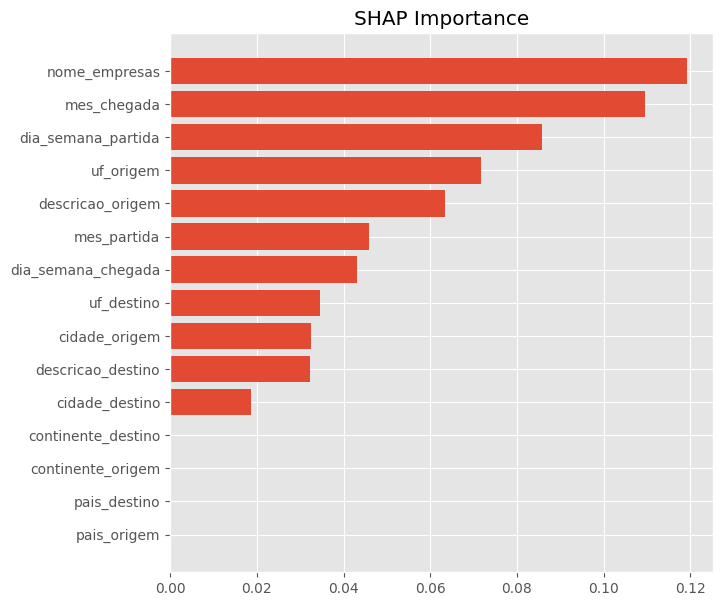

In [81]:
explainer = shap.Explainer(model_ctb)
shap_values = explainer(dt_ax)
shap_importance = shap_values.abs.mean(0).values
sorted_idx = shap_importance.argsort()
fig = plt.figure(figsize=(7, 7))
plt.barh(range(len(sorted_idx)), shap_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(dt_ax.columns)[sorted_idx])
plt.title('SHAP Importance')

### Sequential forward selection (SFS) (em desenvolvimento)

In [ ]:
def selecao_sequencial_de_features(
    modelo,
    X: pd.DataFrame,
    y,
    n_features_to_select=None,
    direction='forward',
    scoring=None,
    cv=5,
    n_jobs=None
) -> dict:
    """
    Aplica o Sequential Feature Selector para selecionar as melhores variáveis preditoras
    de acordo com a métrica de avaliação fornecida.

    Parâmetros:
    -----------
    modelo : estimador
        O modelo de aprendizado de máquina a ser utilizado para a seleção de variáveis.
    X : pd.DataFrame ou np.array
        O conjunto de dados com as variáveis preditoras.
    y : pd.Series ou np.array
        O conjunto de dados com a variável alvo.
    n_features_to_select : int ou float ou 'auto', opcional
        O número de features a serem selecionadas. 
        - Se `int`, seleciona exatamente esse número de features.
        - Se `float`, seleciona uma fração de features (por exemplo, 0.5 para 50%).
        - Se `'auto'`, seleciona metade das features.
        - O padrão é `'auto'`.
    direction : str, opcional
        A direção da seleção: 'forward' para Forward Selection, 'backward' para Backward Selection.
        O padrão é 'forward'.
    scoring : str ou callable, opcional
        A métrica de avaliação a ser usada. Aceita qualquer métrica compatível com o scikit-learn.
        Se None, usa o score padrão do estimador.
    cv : int, cross-validation generator ou um iterável, opcional
        Determina a estratégia de cross-validation. O padrão é 5.
    n_jobs : int ou None, opcional
        O número de jobs a serem executados em paralelo. None significa 1, -1 significa usar todos os processadores.

    Retorna:
    --------
    dict
        Um dicionário contendo:
        - 'sfs_fit': O objeto SequentialFeatureSelector treinado.
        - 'colunas_selecionadas': As colunas selecionadas do DataFrame X.
        - 'suporte': Um array booleano indicando as variáveis selecionadas.
        - 'ranking': O ranking das variáveis (1 para selecionadas).
    """

    # Validar parâmetros de entrada
    if direction not in ['forward', 'backward']:
        raise ValueError("O parâmetro 'direction' deve ser 'forward' ou 'backward'.")

    # Clonar o modelo para evitar alterações no modelo original
    modelo_clone = clone(modelo)

    # Definir 'n_features_to_select' se for None
    if n_features_to_select is None:
        n_features_to_select = 'auto'

    # Inicializar o SequentialFeatureSelector
    sfs = SequentialFeatureSelector(
        estimator=modelo_clone,
        n_features_to_select=n_features_to_select,
        direction=direction,
        scoring=scoring,
        cv=cv,
        n_jobs=n_jobs
    )

    # Ajustar o SequentialFeatureSelector aos dados
    sfs.fit(X, y)

    # Obter as colunas selecionadas
    if isinstance(X, pd.DataFrame):
        colunas_selecionadas = X.columns[sfs.get_support()].tolist()
    else:
        colunas_selecionadas = np.array(range(X.shape[1]))[sfs.get_support()].tolist()

    # Criar um dicionário com os resultados
    resultados_sfs = {
        'sfs_fit': sfs,
        'colunas_selecionadas': colunas_selecionadas,
        'suporte': sfs.get_support(),
        'ranking': sfs.ranking_
    }

    return resultados_sfs

In [ ]:
selecao_sequencial_de_features(model_xgb, X_train_hot, y_train_hot)
colunas_selecionadas_sfs = resultado_sfs['colunas_selecionadas']
print(f"Colunas Selecionadas: {colunas_selecionadas_sfs}")

### Sequential backward selection (SBS) (em desenvolvimento)

In [ ]:
selecao_sequencial_de_features(model_xgb, X_train_hot, y_train_hot,direction='backward')
colunas_selecionadas_sfs = resultado_sfs['colunas_selecionadas']
print(f"Colunas Selecionadas: {colunas_selecionadas_sfs}")

### Boruta (em desenvolvimento)

In [ ]:
def selecao_de_variaveis_boruta(X: pd.DataFrame, y, estimador=None, perc: int = 100, alpha: float = 0.05, max_iter: int = 100, random_state: int = None) -> dict:
    """
    Aplica o algoritmo Boruta para selecionar as variáveis mais importantes de um conjunto de dados.

    Parâmetros:
    -----------
    X : pd.DataFrame
        O conjunto de dados com as variáveis preditoras.
    y : pd.Series ou np.array
        A variável alvo.
    estimador : RandomForestClassifier ou RandomForestRegressor, opcional
        O estimador usado pelo Boruta. Se None, um RandomForest apropriado será criado.
    perc : int, opcional
        Percentil usado para calcular o limiar de importância das features (padrão é 100).
    alpha : float, opcional
        Nível de significância estatística usado pelo algoritmo (padrão é 0.05).
    max_iter : int, opcional
        Número máximo de iterações para o algoritmo Boruta (padrão é 100).
    random_state : int, opcional
        Semente para geração de números aleatórios.

    Retorna:
    --------
    dict
        Um dicionário contendo:
        - 'colunas_selecionadas': Lista das colunas selecionadas.
        - 'colunas_tentativas': Lista das colunas marcadas como tentativas.
        - 'colunas_rejeitadas': Lista das colunas rejeitadas.
        - 'ranking': Ranking completo das variáveis.
        - 'importancias': Importâncias das variáveis conforme calculado pelo Boruta.

    Exceções:
    ---------
    ValueError:
        Se o estimador fornecido não for um RandomForestClassifier ou RandomForestRegressor.
    """

    # Verificar se o estimador foi fornecido, caso contrário criar um padrão
    if estimador is None:
        if pd.api.types.is_numeric_dtype(y):
            estimador = RandomForestRegressor(n_estimators=100, random_state=random_state, n_jobs=-1)
        else:
            estimador = RandomForestClassifier(n_estimators=100, random_state=random_state, n_jobs=-1)
    else:
        if not isinstance(estimador, (RandomForestClassifier, RandomForestRegressor)):
            raise ValueError("O estimador deve ser RandomForestClassifier ou RandomForestRegressor.")

    # Converter y para numpy array se não for
    if isinstance(y, pd.Series):
        y_array = y.values.ravel()
    elif isinstance(y, np.ndarray):
        y_array = y.ravel()
    else:
        y_array = np.array(y).ravel()

    # Inicializar o Boruta
    boruta_selector = BorutaPy(
        estimator=estimador,
        n_estimators='auto',
        perc=perc,
        alpha=alpha,
        max_iter=max_iter,
        random_state=random_state,
        verbose=0
    )

    # Ajustar o Boruta ao conjunto de dados
    boruta_selector.fit(X.values, y_array)

    # Obter as colunas selecionadas, tentativas e rejeitadas
    colunas_selecionadas = X.columns[boruta_selector.support_].tolist()
    colunas_tentativas = X.columns[boruta_selector.support_weak_].tolist()
    colunas_rejeitadas = [col for col in X.columns if col not in colunas_selecionadas + colunas_tentativas]

    # Criar o ranking completo das variáveis
    ranking = pd.Series(boruta_selector.ranking_, index=X.columns).sort_values()

    # Obter as importâncias das variáveis
    importancias = pd.Series(boruta_selector.importances_mean_, index=X.columns)

    # Retornar os resultados em um dicionário
    resultados_boruta = {
        'colunas_selecionadas': colunas_selecionadas,
        'colunas_tentativas': colunas_tentativas,
        'colunas_rejeitadas': colunas_rejeitadas,
        'ranking': ranking,
        'importancias': importancias
    }

    return resultados_boruta

In [ ]:
# Aplicando a seleção de variáveis com Boruta
resultados_boruta = selecao_de_variaveis_boruta(X_train_hot, y_train_hot, random_state=42)

# Acessando as colunas selecionadas
colunas_selecionadas = resultados_boruta['colunas_selecionadas']
print("Colunas Selecionadas:")
print(colunas_selecionadas)

# Acessando o ranking das variáveis
print("\nRanking das Variáveis:")
print(resultados_boruta['ranking'])

# Acessando as importâncias das variáveis
print("\nImportâncias das Variáveis:")
print(resultados_boruta['importancias'])

### Mutual Information (MI)

In [59]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

def variaveis_significativas_mi(
    df: pd.DataFrame,
    y: str,
    problem_type: str = 'classification',
    n_features: int = None
) -> pd.DataFrame:
    """
    Calcula a Informação Mútua entre variáveis preditoras e a variável alvo,
    retornando um DataFrame com as variáveis ordenadas pelo score de MI.

    Parâmetros:
    -----------
    df : pd.DataFrame
        DataFrame contendo os dados.
    y : str
        Nome da variável dependente (target) no DataFrame.
    problem_type : str, opcional
        Tipo de problema: 'classification' ou 'regression'. Padrão é 'classification'.
    n_features : int, opcional
        Número de features mais importantes a retornar. Se None, retorna todas.

    Retorna:
    --------
    pd.DataFrame
        DataFrame com duas colunas:
        — variável: nome da variável preditora  
        — score_mi: score de Informação Mútua  
        Ordenado do maior para o menor score. Se n_features for especificado,
        retorna apenas as top n_features.

    Exceções:
    ---------
    ValueError:
        — Se a variável alvo não existir no DataFrame.  
        — Se problem_type não for 'classification' nem 'regression'.
    """
    # Validação de inputs
    if y not in df.columns:
        raise ValueError(f"A variável dependente '{y}' não foi encontrada no DataFrame.")

    # Separar preditoras (X) e alvo (y)
    X = df.drop(columns=[y])
    y_data = df[y]

    # Codificar variáveis categóricas em X
    X_encoded = X.copy()
    for col in X_encoded.select_dtypes(include=['object', 'category']):
        X_encoded[col] = LabelEncoder().fit_transform(X_encoded[col].astype(str))

    # Codificar variável alvo e calcular MI conforme tipo de problema
    if problem_type == 'classification':
        y_encoded = LabelEncoder().fit_transform(y_data.astype(str)) \
            if y_data.dtype == 'object' or y_data.dtype.name == 'category' else y_data
        mi_scores = mutual_info_classif(X_encoded, y_encoded, discrete_features='auto')
    elif problem_type == 'regression':
        y_encoded = y_data
        mi_scores = mutual_info_regression(X_encoded, y_encoded, discrete_features='auto')
    else:
        raise ValueError("O parâmetro 'problem_type' deve ser 'classification' ou 'regression'.")

    # Construir DataFrame de resultados ordenado pelo score
    mi_df = pd.DataFrame({
        'variável': X.columns,
        'score_mi': mi_scores
    }).sort_values(by='score_mi', ascending=False).reset_index(drop=True)

    # Retornar somente as top n_features, se especificado
    return mi_df.head(n_features) if n_features else mi_df



In [60]:
# Para um problema de classificação
mi_resultado = variaveis_significativas_mi(df, 'status_do_voo', problem_type='classification')

mi_resultado

variável  score_mi
0                delta_tempo_partida_delta  0.373491
1                  delta_tempo_partida_int  0.373378
2                delta_tempo_chegada_delta  0.184377
3                  delta_tempo_chegada_int  0.182368
4                             partida_real  0.044021
..                                     ...       ...
69                             pais_origem  0.000143
70  precipitacao_total_horario_mm__destino  0.000000
71                               codigo_di  0.000000
72                       continente_origem  0.000000
73                      continente_destino  0.000000

[74 rows x 2 columns]

In [61]:
# Se quiser selecionar apenas as top 10 variáveis
mi_top10 = variaveis_significativas_mi(df, 'status_do_voo', problem_type='classification', n_features=10)
print(mi_top10)

                    variável  score_mi
0  delta_tempo_partida_delta  0.373465
1    delta_tempo_partida_int  0.373202
2  delta_tempo_chegada_delta  0.183663
3    delta_tempo_chegada_int  0.182964
4               partida_real  0.044008
5               chegada_real  0.041791
6           partida_prevista  0.035084
7           chegada_prevista  0.031979
8          codigo_tipo_linha  0.022478
9                 numero_voo  0.019860


### ReliefF

In [62]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KDTree

def selecao_de_variaveis_relieff(
    X: pd.DataFrame, 
    y: pd.Series | np.ndarray, 
    n_neighbors: int = 10
) -> pd.DataFrame:
    """
    Implementa o algoritmo ReliefF para seleção de variáveis. Retorna um DataFrame contendo 
    apenas as variáveis preditoras ordenadas pelo score de relevância (do maior para o menor).

    Parâmetros:
    -----------
    X : pd.DataFrame
        Conjunto de dados com as variáveis preditoras.
    y : pd.Series ou np.ndarray
        Variável alvo.
    n_neighbors : int, opcional
        Número de vizinhos a considerar (padrão é 10).

    Retorna:
    --------
    pd.DataFrame
        Um DataFrame com duas colunas:
        — variável: nome da variável preditora  
        — score_relieff: score de relevância calculado pelo algoritmo ReliefF  
        Ordenado do maior para o menor score. Se não houver variáveis, retorna DataFrame vazio.

    Exceções:
    ---------
    ValueError:
        — Se X não for um DataFrame.  
        — Se y não for uma Série do pandas ou array do NumPy.
    """
    # Validação de inputs
    if not isinstance(X, pd.DataFrame):
        raise ValueError("O parâmetro 'X' deve ser um DataFrame do pandas.")
    if not isinstance(y, (pd.Series, np.ndarray)):
        raise ValueError("O parâmetro 'y' deve ser uma Série do pandas ou um array do NumPy.")

    # Codificação de variáveis categóricas
    X_copy = X.copy()
    for col in X_copy.select_dtypes(include=['object', 'category']).columns:
        X_copy[col] = LabelEncoder().fit_transform(X_copy[col].astype(str))

    # Preparação dos arrays para cálculo
    X_array = X_copy.values
    y_encoded = LabelEncoder().fit_transform(y) if hasattr(y, "dtype") and y.dtype == object else np.array(y)

    # Construção da árvore KD para vizinhança
    tree = KDTree(X_array)
    n_features = X_array.shape[1]
    weights = np.zeros(n_features)
    classes = np.unique(y_encoded)
    n_classes = len(classes)

    # Cálculo dos pesos ReliefF
    for instance, label in zip(X_array, y_encoded):
        distances, indices = tree.query([instance], k=n_neighbors + 1)
        for idx in indices[0][1:]:
            diff = np.abs(instance - X_array[idx])
            if y_encoded[idx] == label:
                weights -= diff / n_neighbors
            else:
                weights += diff / (n_neighbors * (n_classes - 1))

    # Normalização dos scores para [0,1]
    min_w, max_w = weights.min(), weights.max()
    weights = (weights - min_w) / (max_w - min_w) if max_w > min_w else np.zeros_like(weights)

    # Construção do DataFrame de resultados
    relieff_scores = pd.DataFrame({
        'variável': X_copy.columns,
        'score_relieff': weights
    }).sort_values(by='score_relieff', ascending=False).reset_index(drop=True)

    return relieff_scores


In [63]:
# Separando as variáveis preditoras e a variável alvo
X = df.drop(columns=['status_do_voo'])
y = df['status_do_voo']

# Aplicando a função de seleção de variáveis com ReliefF
relieff_resultado = selecao_de_variaveis_relieff(X, y, n_neighbors=10)

# Exibindo as variáveis mais significativas
print(relieff_resultado)

                                    variável  score_relieff
0                  delta_tempo_partida_delta       1.000000
1                    delta_tempo_partida_int       0.999972
2                                pais_origem       0.964177
3                          continente_origem       0.964177
4                         continente_destino       0.964177
..                                       ...            ...
69                          chegada_prevista       0.443973
70   vento_direcao_horaria_gr_deg_gr__origem       0.332836
71  vento_direcao_horaria_gr_deg_gr__destino       0.308006
72                                      rota       0.191026
73                                numero_voo       0.000000

[74 rows x 2 columns]


### Variance Threshold

In [64]:
from sklearn.feature_selection import VarianceThreshold

In [65]:
def reduzir_cardinalidade(X: pd.DataFrame, threshold: float = 0.05) -> pd.DataFrame:
    """
    Reduz a cardinalidade das variáveis categóricas agrupando categorias menos frequentes em 'Outros'.
    
    Parâmetros:
    -----------
    X : pd.DataFrame
        DataFrame com as variáveis preditoras.
    threshold : float, opcional
        Percentual mínimo de frequência para manter a categoria original. Categorias com frequência abaixo desse valor serão agrupadas.
        O padrão é 0.05 (5%).
    
    Retorna:
    --------
    pd.DataFrame
        DataFrame com a cardinalidade reduzida nas variáveis categóricas.
    """
    X_reduzido = X.copy()
    cols_categoricas = X_reduzido.select_dtypes(include=['object', 'category']).columns
    
    for col in cols_categoricas:
        freq = X_reduzido[col].value_counts(normalize=True)
        categorias_para_manter = freq[freq >= threshold].index
        X_reduzido[col] = X_reduzido[col].apply(lambda x: x if x in categorias_para_manter else 'Outros')
    
    return X_reduzido

In [66]:
def selecao_de_variaveis_variance_threshold(X: pd.DataFrame, threshold: float = 0.0, cardinality_threshold: float = 0.05) -> pd.DataFrame:
    """
    Aplica o método Variance Threshold para selecionar variáveis com base na variância,
    após reduzir a cardinalidade das variáveis categóricas.

    Parâmetros:
    -----------
    X : pd.DataFrame
        O conjunto de dados com as variáveis preditoras.
    threshold : float, opcional
        O limiar de variância. Features com variância abaixo desse valor serão removidas.
        O padrão é 0.0, que remove features com o mesmo valor em todas as amostras.
    cardinality_threshold : float, opcional
        Percentual mínimo de frequência para manter as categorias originais nas variáveis categóricas.
        Categorias com frequência abaixo desse valor serão agrupadas em 'Outros'.
        O padrão é 0.05 (5%).

    Retorna:
    --------
    pd.DataFrame
        DataFrame contendo apenas as variáveis que possuem variância acima do limiar especificado.

    Exceções:
    ---------
    ValueError:
        Se 'X' não for um DataFrame ou se todas as features forem removidas devido ao limiar.

    Exemplo de Uso:
    ---------------
    >>> X_selecionado = selecao_de_variaveis_variance_threshold(X, threshold=0.1, cardinality_threshold=0.05)
    >>> print("Variáveis selecionadas:", X_selecionado.columns.tolist())
    """
    # Verificar se X é um DataFrame
    if not isinstance(X, pd.DataFrame):
        raise ValueError("O parâmetro 'X' deve ser um DataFrame do pandas.")
    
    # Reduzir a cardinalidade das variáveis categóricas
    X_reduzido = reduzir_cardinalidade(X, threshold=cardinality_threshold)
    
    # Identificar colunas não numéricas
    cols_categoricas = X_reduzido.select_dtypes(include=['object', 'category']).columns
    
    # Codificar variáveis categóricas
    if len(cols_categoricas) > 0:
        X_processed = pd.get_dummies(X_reduzido, columns=cols_categoricas, drop_first=False, dummy_na=True)
    else:
        X_processed = X_reduzido.copy()
    
    # Aplicar o Variance Threshold
    selector = VarianceThreshold(threshold=threshold)
    X_selected = selector.fit_transform(X_processed)
    
    # Obter as colunas que foram selecionadas
    features_selecionadas = X_processed.columns[selector.get_support(indices=True)]
    
    # Verificar se alguma feature foi selecionada
    if X_selected.shape[1] == 0:
        raise ValueError("Nenhuma variável foi selecionada. Considere diminuir o valor do 'threshold'.")
    
    # Retornar o DataFrame com as features selecionadas
    X_selecionado = pd.DataFrame(X_selected, columns=features_selecionadas, index=X.index)
    
    return X_selecionado

In [67]:
# Aplicando a função com threshold de variância 0.0 e cardinalidade 0.2 (20%)
X_selecionado = selecao_de_variaveis_variance_threshold(
    X=df,
    threshold=0.0,
    cardinality_threshold=0.2
)

print("\nNúmero de Variáveis Selecionadas:", X_selecionado.shape[1])
print("Variáveis selecionadas:", X_selecionado.columns.tolist())


Número de Variáveis Selecionadas: 60
Variáveis selecionadas: ['codigo_di', 'delta_tempo_partida_int', 'delta_tempo_chegada_int', 'dia_mes_partida', 'hora_partida', 'dia_mes_chegada', 'hora_chegada', 'latitude_aero_origem', 'longitude_aero_origem', 'latitude_aero_destino', 'longitude_aero_destino', 'precipitacao_total_horario_mm__origem', 'pressao_atmosferica_ao_nivel_da_estacao_horaria_mb__origem', 'pressao_atmosferica_max_na_hora_ant_aut_mb__origem', 'pressao_atmosferica_min_na_hora_ant_aut_mb__origem', 'temperatura_do_ar_bulbo_seco_horaria_degc__origem', 'temperatura_do_ponto_de_orvalho_degc__origem', 'temperatura_maxima_na_hora_ant_aut_degc__origem', 'temperatura_minima_na_hora_ant_aut_degc__origem', 'temperatura_orvalho_max_na_hora_ant_aut_degc__origem', 'temperatura_orvalho_min_na_hora_ant_aut_degc__origem', 'umidade_rel_max_na_hora_ant_aut_pcnt__origem', 'umidade_rel_min_na_hora_ant_aut_pcnt__origem', 'umidade_relativa_do_ar_horaria_pcnt__origem', 'vento_direcao_horaria_gr_deg_g

### Information Gain

In [68]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

def variaveis_significativas_information_gain(df: pd.DataFrame, y: str) -> pd.DataFrame:
    """
    Calcula o Ganho de Informação (Information Gain) entre variáveis preditoras e a variável alvo.
    Retorna um DataFrame contendo apenas as variáveis preditoras ordenadas pelo score de Information Gain 
    (do maior para o menor).

    Parâmetros:
    -----------
    df : pd.DataFrame
        O DataFrame que contém os dados.
    y : str
        O nome da variável dependente (target) no DataFrame.

    Retorna:
    --------
    pd.DataFrame
        Um DataFrame com duas colunas:
        — variável: nome da variável preditora  
        — score_information_gain: valor do Information Gain  
        Ordenado do maior para o menor score. Se não houver variáveis preditoras, retorna DataFrame vazio.

    Exceções:
    ---------
    ValueError:
        — Se a variável dependente não estiver presente no DataFrame.
    """
    if y not in df.columns:
        raise ValueError(f"A variável dependente '{y}' não foi encontrada no DataFrame.")

    X = df.drop(columns=[y])
    y_data = df[y]

    # Encode target se categórica
    if y_data.dtype == 'object' or y_data.dtype.name == 'category':
        y_encoded = LabelEncoder().fit_transform(y_data.astype(str))
    else:
        y_encoded = y_data.values

    def calcular_entropia(arr):
        _, counts = np.unique(arr, return_counts=True)
        probs = counts / counts.sum()
        return -np.sum(probs * np.log2(probs))

    entropia_y = calcular_entropia(y_encoded)

    resultados = []
    for coluna in X.columns:
        col = X[coluna]
        if col.dtype == 'object' or col.dtype.name == 'category':
            col_encoded = LabelEncoder().fit_transform(col.astype(str))
        else:
            col_encoded = col.fillna(col.median()).values

        # Entropia condicional H(Y|X)
        valores, counts = np.unique(col_encoded, return_counts=True)
        entropia_cond = sum(
            (counts[i] / len(col_encoded)) * calcular_entropia(y_encoded[col_encoded == valor])
            for i, valor in enumerate(valores)
        )

        ig = entropia_y - entropia_cond
        resultados.append({'variável': coluna, 'score_information_gain': ig})

    ig_df = pd.DataFrame(resultados).sort_values(by='score_information_gain', ascending=False).reset_index(drop=True)
    return ig_df


In [69]:
# Calculando o Information Gain para cada variável preditora
ig_resultado = variaveis_significativas_information_gain(df, 'status_do_voo')

# Exibindo as variáveis mais significativas
print(ig_resultado)

                     variável  score_information_gain
0                partida_real                0.562229
1                chegada_real                0.560864
2   delta_tempo_partida_delta                0.539807
3     delta_tempo_partida_int                0.539807
4            chegada_prevista                0.474826
..                        ...                     ...
69          codigo_tipo_linha                0.000015
70                pais_origem                0.000000
71               pais_destino                0.000000
72         continente_destino                0.000000
73          continente_origem                0.000000

[74 rows x 2 columns]


### Information Value IV

In [70]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

def variaveis_significativas_information_value(
    df: pd.DataFrame, 
    y: str, 
    bins: int = 10, 
    show_woe: bool = False
) -> pd.DataFrame | tuple[pd.DataFrame, dict]:
    """
    Calcula o Information Value (IV) e opcionalmente o Weight of Evidence (WoE) para cada variável preditora 
    em relação à variável alvo binária. Retorna um DataFrame ordenado pelo IV (do maior para o menor). 

    Parâmetros:
    -----------
    df : pd.DataFrame
        O DataFrame que contém os dados.
    y : str
        Nome da variável dependente binária no DataFrame.
    bins : int, opcional
        Número de bins para discretizar variáveis numéricas (padrão = 10).
    show_woe : bool, opcional
        Se True, retorna também um dicionário com DataFrames de WoE para cada variável.

    Retorna:
    --------
    pd.DataFrame
        DataFrame com duas colunas:
        — variável: nome da variável preditora  
        — information_value: valor do Information Value  
        Ordenado do maior para o menor.  
    tuple(pd.DataFrame, dict)
        Se show_woe=True, retorna também um dicionário cujo chave é o nome da variável e valor é um DataFrame com colunas WoE por bin.

    Exceções:
    ---------
    ValueError:
        — Se a variável dependente não existir no DataFrame.  
        — Se a variável dependente não for binária.
    """
    # Validação de inputs
    if y not in df.columns:
        raise ValueError(f"A variável dependente '{y}' não foi encontrada no DataFrame.")
    if df[y].nunique() != 2:
        raise ValueError("A variável dependente deve ser binária.")

    # Preparar cópia do DataFrame e codificar variável alvo
    df_copy = df.copy()
    df_copy[y] = LabelEncoder().fit_transform(df_copy[y])

    total_eventos = df_copy[y].sum()
    total_nao_eventos = df_copy.shape[0] - total_eventos

    # Inicializar estruturas para armazenar IV e WoE
    iv_list = []
    woe_dict = {}

    # Loop pelas variáveis preditoras
    for coluna in df_copy.drop(columns=[y]).columns:
        x = df_copy[coluna]

        # Discretizar variáveis numéricas ou usar categorias originais
        if pd.api.types.is_numeric_dtype(x):
            x_binned = pd.qcut(x, q=bins, duplicates='drop')
        else:
            x_binned = x.astype(str)

        # Construir tabela agregada de eventos e não eventos
        agg = pd.DataFrame({
            'total': x_binned.value_counts(),
            'eventos': df_copy.groupby(x_binned)[y].sum()
        }).fillna(0)
        agg['nao_eventos'] = agg['total'] - agg['eventos']

        # Calcular proporções e evitar zeros
        agg['prop_eventos'] = agg['eventos'] / total_eventos
        agg['prop_nao_eventos'] = agg['nao_eventos'] / total_nao_eventos
        agg.replace({'prop_eventos': {0: 1e-4}, 'prop_nao_eventos': {0: 1e-4}}, inplace=True)

        # Calcular WoE e IV
        agg['woe'] = np.log(agg['prop_eventos'] / agg['prop_nao_eventos'])
        agg['iv'] = (agg['prop_eventos'] - agg['prop_nao_eventos']) * agg['woe']
        iv_value = agg['iv'].sum()

        # Armazenar resultados
        iv_list.append({'variável': coluna, 'information_value': iv_value})
        if show_woe:
            woe_dict[coluna] = agg[['woe']]

    # Construir DataFrame final ordenado por IV
    iv_df = pd.DataFrame(iv_list).sort_values(by='information_value', ascending=False).reset_index(drop=True)

    # Retornar apenas IV ou IV + WoE conforme solicitado
    return (iv_df, woe_dict) if show_woe else iv_df


In [71]:
# Calculando o Information Value para cada variável preditora
iv_resultado = variaveis_significativas_information_value(df, y='status_do_voo', bins=10, show_woe=False)

# Exibindo as variáveis mais significativas
print(iv_resultado)

                                 variável  information_value
0                            chegada_real          15.045915
1                            partida_real          15.004282
2                        chegada_prevista          11.405517
3                        partida_prevista          11.335595
4                 delta_tempo_partida_int          11.092238
..                                    ...                ...
69                           pais_destino           0.000000
70                     continente_destino           0.000000
71                      continente_origem           0.000000
72  precipitacao_total_horario_mm__origem           0.000000
73                              codigo_di           0.000000

[74 rows x 2 columns]


In [72]:
iv_df, woe = variaveis_significativas_information_value(df, 'status_do_voo', show_woe=True)

### Stability Selection (em desenvolvimento)

In [77]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

def selecao_de_variaveis_stability_selection(
    X: pd.DataFrame,
    y,
    base_estimator=None,
    lambda_name='C',
    lambda_grid=None,
    n_bootstrap_iterations=100,
    threshold=0.1,
    random_state=None
) -> dict:
    """
    Aplica o método Stability Selection para selecionar variáveis importantes.

    Parâmetros:
    -----------
    X : pd.DataFrame
        O conjunto de dados com as variáveis preditoras.
    y : pd.Series ou np.array
        A variável alvo.
    base_estimator : estimador, opcional
        O estimador base utilizado pelo Stability Selection. Se None, será usado LogisticRegression com regularização L1.
    lambda_name : str, opcional
        Nome do parâmetro de regularização (por exemplo, 'C' para modelos de regressão logística).
    lambda_grid : array-like, opcional
        Valores de penalização a serem considerados. Se None, será usado np.logspace(-5, 0, 50).
    n_bootstrap_iterations : int, opcional
        Número de iterações de bootstrap (padrão é 100).
    threshold : float, opcional
        Limiar para seleção das variáveis (padrão é 0.1).
    random_state : int, opcional
        Semente para geração de números aleatórios.

    Retorna:
    --------
    dict
        Um dicionário contendo:
        - 'variaveis_selecionadas': Lista das variáveis selecionadas.
        - 'scores_estabilidade': DataFrame com as variáveis e seus scores de estabilidade.

    Exemplo de Uso:
    ---------------
    >>> resultados = selecao_de_variaveis_stability_selection(X, y, threshold=0.2)
    >>> print("Variáveis selecionadas:", resultados['variaveis_selecionadas'])
    """
    # Verificar se X é um DataFrame
    if not isinstance(X, pd.DataFrame):
        raise ValueError("O parâmetro 'X' deve ser um DataFrame do pandas.")

    # Converter y para array unidimensional
    if isinstance(y, pd.Series):
        y_array = y.values.ravel()
    elif isinstance(y, np.ndarray):
        y_array = y.ravel()
    else:
        y_array = np.array(y).ravel()

    # Codificar y se for categórico
    if y.dtype == 'object' or y.dtype.name == 'category':
        le = LabelEncoder()
        y_array = le.fit_transform(y_array)
    else:
        y_array = y_array

    # Definir o estimador base se não for fornecido
    if base_estimator is None:
        base_estimator = LogisticRegression(
            penalty='l1',
            solver='saga',
            max_iter=10000,
            random_state=random_state
        )

    # Definir o grid de penalização se não for fornecido
    if lambda_grid is None:
        lambda_grid = np.logspace(-5, 0, 50)

    # Importar StabilitySelection (necessita instalação adicional)
    try:
        from sklearn_stability_selection import StabilitySelection
    except ImportError:
        raise ImportError("Você precisa instalar o pacote 'sklearn_stability_selection'. Use 'pip install sklearn_stability_selection'.")

    # Inicializar o Stability Selection
    stability_model = StabilitySelection(
        base_estimator=base_estimator,
        lambda_name=lambda_name,
        lambda_grid=lambda_grid,
        n_bootstrap_iterations=n_bootstrap_iterations,
        threshold=threshold,
        random_state=random_state
    )

    # Ajustar o modelo aos dados
    stability_model.fit(X.values, y_array)

    # Obter os scores de estabilidade
    scores = stability_model.stability_scores_.max(axis=1)
    scores_estabilidade = pd.Series(scores, index=X.columns)

    # Selecionar as variáveis com score acima do limiar
    variaveis_selecionadas = scores_estabilidade[scores_estabilidade >= threshold].index.tolist()

    # Criar DataFrame com os scores
    df_scores = pd.DataFrame({
        'Variável': X.columns,
        'Score_Estabilidade': scores_estabilidade.values
    }).sort_values(by='Score_Estabilidade', ascending=False)

    # Retornar os resultados
    resultados = {
        'variaveis_selecionadas': variaveis_selecionadas,
        'scores_estabilidade': df_scores
    }

    return resultados


In [ ]:
# Aplicando a função de seleção de variáveis com Stability Selection
resultados = selecao_de_variaveis_stability_selection(
    X=X_train,
    y=y_train,
    threshold=0.2,
    random_state=42
)

# Exibindo as variáveis selecionadas
print("Variáveis Selecionadas:")
print(resultados['variaveis_selecionadas'])

# Exibindo os scores de estabilidade
print("\nScores de Estabilidade:")
print(resultados['scores_estabilidade'])

### Algoritmo Genetico (em desenvolvimento)

In [79]:
def selecao_de_variaveis_algoritmo_genetico(
    modelo,
    X: pd.DataFrame,
    y,
    cv=5,
    scoring='accuracy',
    generations=40,
    population_size=100,
    mutation_probability=0.1,
    tournament_size=3,
    elitism=True,
    n_jobs=-1,
    random_state=None
) -> dict:
    """
    Aplica a seleção de variáveis usando Algoritmos Genéticos para identificar as variáveis mais relevantes.
    
    Parâmetros:
    -----------
    modelo : estimador
        O modelo de aprendizado de máquina a ser utilizado para avaliar os subconjuntos de variáveis.
    X : pd.DataFrame
        O conjunto de dados com as variáveis preditoras.
    y : pd.Series ou np.array
        A variável alvo.
    cv : int, opcional
        Número de dobras para a validação cruzada (padrão é 5).
    scoring : str ou callable, opcional
        Métrica de avaliação a ser usada (padrão é 'accuracy').
    generations : int, opcional
        Número de gerações para a evolução do algoritmo genético (padrão é 40).
    population_size : int, opcional
        Tamanho da população (número de indivíduos) em cada geração (padrão é 100).
    mutation_probability : float, opcional
        Probabilidade de mutação para cada indivíduo (padrão é 0.1).
    tournament_size : int, opcional
        Tamanho do torneio para seleção dos indivíduos (padrão é 3).
    elitism : bool, opcional
        Se True, mantém o melhor indivíduo de uma geração para a próxima (padrão é True).
    n_jobs : int, opcional
        Número de jobs a serem executados em paralelo. -1 utiliza todos os processadores (padrão é -1).
    random_state : int, opcional
        Semente para geração de números aleatórios.
    
    Retorna:
    --------
    dict
        Um dicionário contendo:
        - 'melhores_variaveis': Lista das variáveis selecionadas.
        - 'melhor_score': Melhor score obtido pelo modelo usando as variáveis selecionadas.
        - 'historico_scores': Lista dos scores obtidos ao longo das gerações.
        - 'ga_search': Objeto GASearchCV ajustado (para acesso a mais detalhes, se necessário).
    
    Exemplo de Uso:
    ---------------
    >>> from sklearn.ensemble import RandomForestClassifier
    >>> modelo = RandomForestClassifier(random_state=42)
    >>> resultados = selecao_de_variaveis_algoritmo_genetico(modelo, X, y)
    >>> print("Variáveis selecionadas:", resultados['melhores_variaveis'])
    """
    
    # Importar as bibliotecas necessárias
    try:
        from sklearn_genetic_opt import GASearchCV  # Biblioteca correta
        from sklearn_genetic_opt.space import Categorical, Continuous, Integer
        from sklearn_genetic_opt.utils import plot_fitness_evolution
    except ImportError:
        raise ImportError("Você precisa instalar o pacote 'sklearn-genetic-opt'. Use 'pip install sklearn-genetic-opt'.")
    
    # Verificar se X é um DataFrame
    if not isinstance(X, pd.DataFrame):
        raise ValueError("O parâmetro 'X' deve ser um DataFrame do pandas.")
    
    # Converter y para array unidimensional
    if isinstance(y, pd.Series):
        y_array = y.values.ravel()
    elif isinstance(y, np.ndarray):
        y_array = y.ravel()
    else:
        y_array = np.array(y).ravel()
    
    # Codificar y se for categórico
    if y.dtype == 'object' or y.dtype.name == 'category':
        le = LabelEncoder()
        y_array = le.fit_transform(y_array)
    else:
        y_array = y_array
    
    # Definir o espaço de busca das variáveis
    variable_space = {}
    for feature in X.columns:
        variable_space[feature] = Categorical([True, False])
    
    # Configurar o GASearchCV
    ga_search = GASearchCV(
        estimator=clone(modelo),
        cv=cv,
        scoring=scoring,
        population_size=population_size,
        generations=generations,
        mutation_probability=mutation_probability,
        tournament_size=tournament_size,
        elitism=elitism,
        n_jobs=n_jobs,
        keep_top_k=1,
        verbose=True,
        criteria='max',
        param_grid=variable_space,
        error_score='raise',
        random_state=random_state
    )
    
    # Ajustar o GASearchCV aos dados
    ga_search.fit(X, y_array)
    
    # Obter as melhores variáveis
    best_params = ga_search.best_params_
    melhores_variaveis = [feature for feature, use in best_params.items() if use]
    
    # Obter o melhor score
    melhor_score = ga_search.best_score_
    
    # Obter o histórico de scores
    historico_scores = ga_search.history['fitness']
    
    # Retornar os resultados
    resultados = {
        'melhores_variaveis': melhores_variaveis,
        'melhor_score': melhor_score,
        'historico_scores': historico_scores,
        'ga_search': ga_search  # Incluindo o objeto ga_search caso queira acessar mais detalhes
    }
    
    return resultados

In [ ]:
# Aplicando a seleção de variáveis com Algoritmo Genético
resultados = selecao_de_variaveis_algoritmo_genetico(
    modelo=model_xgb,
    X=X_train_hot,
    y=y_train_hot,
    cv=5,
    scoring='accuracy',
    generations=20,
    population_size=50,
    mutation_probability=0.1,
    tournament_size=3,
    elitism=True,
    n_jobs=-1,
    random_state=42
)

# Exibindo as variáveis selecionadas
print("Variáveis Selecionadas:")
print(resultados['melhores_variaveis'])

# Exibindo o melhor score
print("\nMelhor Score:")
print(resultados['melhor_score'])

In [ ]:
# Aplicando a seleção de variáveis com Algoritmo Genético
resultados = selecao_de_variaveis_algoritmo_genetico(
    modelo=model_xgb,
    X=X_train_hot,
    y=y_train_hot,
    cv=5,
    scoring='accuracy',
    generations=20,
    population_size=50,
    random_state=42
)

# Exibindo as variáveis selecionadas
print("Variáveis Selecionadas:")
print(resultados['melhores_variaveis'])

# Exibindo o melhor score
print("\nMelhor Score:")
print(resultados['melhor_score'])

# Plotando a evolução do score ao longo das gerações
from sklearn_genetic.plots import plot_fitness_evolution

plot_fitness_evolution(resultados['ga_search'].history)

### TesteS de BBT

In [ ]:
pip install mlxtend==0.1.7

In [121]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.base import clone

def selecao_sequencial_avanco(modelo, X, y, k_features='best', scoring='accuracy', cv=5, forward=True, floating=False):
    """
    Aplica o método de Seleção Sequencial de Features (Sequential Forward Selection - SFS)
    para selecionar as melhores variáveis preditoras de acordo com a métrica de avaliação fornecida.

    Parâmetros:
    -----------
    modelo : objeto do modelo
        O modelo de aprendizado de máquina a ser utilizado para seleção de variáveis.
    X : pd.DataFrame ou np.array
        O conjunto de dados com as variáveis preditoras.
    y : pd.Series ou np.array
        O conjunto de dados com a variável alvo.
    k_features : int ou 'best', opcional
        O número de features a serem selecionadas. Se 'best', seleciona o melhor conjunto de features.
    scoring : str, opcional
        A métrica de avaliação (padrão é 'accuracy'). Aceita qualquer métrica compatível com o `cross_val_score` do scikit-learn.
    cv : int, opcional
        O número de dobras na validação cruzada (padrão é 5).
    forward : bool, opcional
        Se True, aplica Forward Selection; se False, aplica Backward Selection (padrão é True).
    floating : bool, opcional
        Se True, aplica o algoritmo SFFS ou SBFS (Floating Forward/Backward Selection) (padrão é False).

    Retorna:
    --------
    dict
        Um dicionário contendo:
        - 'sfs_fit': O modelo SFS treinado.
        - 'colunas_selecionadas': As colunas selecionadas do DataFrame X.
        - 'scores': O score da métrica de avaliação para cada iteração.
    """
    
    # Inicializando o método de seleção sequencial
    sfs = SFS(modelo, 
              k_features=k_features, 
              forward=forward, 
              floating=floating, 
              scoring=scoring, 
              cv=cv)

    # Ajustando o modelo SFS aos dados
    sfs_fit = sfs.fit(X, y)
    
    # Criando um dicionário com os resultados
    resultados_sfs = {
        'sfs_fit': sfs_fit,
        'colunas_selecionadas': list(X.columns[list(sfs_fit.k_feature_idx_)]),
        'scores': sfs_fit.k_score_
    }
    
    return resultados_sfs

ModuleNotFoundError: No module named 'mlxtend.feature_selection'

In [ ]:
# Aplicando a Seleção Sequencial de Features com 5 variáveis
resultado_sfs = selecao_sequencial_avanco(model_xgb, X_train_hot, y_train_hot, k_features=5)